# Numerically Evaluating the Inverse Laplace Transforms of Various Laplace-space Functions  
Rahul Yerrabelli  
2021  


# Setup

In [ ]:
#@title ## Basic imports

import sys
print(sys.version)
import importlib  # for reloading imports to source functions
#from IPython.display import HTML, Math, Javascript
import IPython.display
import os
import time

import itertools
import inspect 
import math
import warnings
import requests

import numpy as np
import pandas as pd
import scipy as sp
import mpmath as mp
import matplotlib.pyplot as plt
import matplotlib.ticker
import collections

warnings.simplefilter("default")
#warnings.simplefilter('error'). # throws all warnings as errors
# How to display stack traces, options: Plain, Context (default), Verbose
%xmode Context 
# Turn on or off to cause debug mode to auto enter if exception is thrown
%pdb off

# Below code allows latex to be formatted nicely as google colab output
# Source: https://stackoverflow.com/a/61876185/2879686
def load_mathjax_in_cell_output():
  display(IPython.display.HTML("<script src='https://www.gstatic.com/external_hosted/mathjax/latest/MathJax.js?config=default'></script>"))
get_ipython().events.register("pre_run_cell", load_mathjax_in_cell_output)

# Avoids scroll-in-the-scroll in the entire Notebook
def resize_colab_cell():
  display(IPython.display.Javascript('google.colab.output.setIframeHeight(0, true, {maxHeight: 10000})'))
get_ipython().events.register('pre_run_cell', resize_colab_cell)


"""
requests.get('http://172.28.0.2:9000/api/sessions').json() =
[{'id': 'e0a49454-e812-4d99-aa6f-9d7b80a9616c',
  'kernel': {'connections': 1,
   'execution_state': 'busy',
   'id': '6fd9c8b4-6573-4ffa-a7d6-f56803a0092c',
   'last_activity': '2021-12-01T08:12:08.239708Z',
   'name': 'python3'},
  'name': 'ModelInversions.ipynb',
  'notebook': {'name': 'ModelInversions.ipynb',
   'path': 'fileId=1ZAqQEIxR08eODSPEHvKPwbZoioVdV8L9'},
  'path': 'fileId=1ZAqQEIxR08eODSPEHvKPwbZoioVdV8L9',
  'type': 'notebook'}]
"""
notebook_filename = requests.get('http://172.28.0.2:9000/api/sessions').json()[0]['name']


def display_equations(plot_props):
    # Code created myself (Rahul Yerrabelli)
    for key, val in plot_props.items():
        eqn = val.get("eqn",{}).get("text")
        if eqn:
            # Will display latex. Can be surrounded by $ or not - same result. 
            # However, will not work if there is non-latex text (text not surrounded by $)
            # Thus, remove them all
            display(IPython.display.Math(eqn.replace(r"$",r"$\Huge ", 1).replace(r"$","") ))

simple_laplaces = {}

def get_path_to_save(plot_props:dict=None, file_prefix="", save_filename:str=None, save_in_subfolder:str=None, extension="png", create_folder_if_necessary=True):
    """
    Code created myself (Rahul Yerrabelli)
    """
    replace_characters = {
        "$": "",
        "\\frac":"",
        "\\mathrm":"",
        "\\left(":"(",
        "\\right)":")",
        "\\left[":"[",
        "\\right]":"]",
        "\\": "",
        "/":"-",
        "{": "(",
        "}": ")",
        "<":"",
        ">":"",
        "?":"",
        "_":"",
        "^":"",
        "*":"",
        "!":"",
        ":":"-",
        "|":"-",
        ".":"_",
    }

    # define save_filename based on plot_props
    if plot_props is not None and save_filename is None:
        s_eqn = plot_props["s"]["eqn"]["text"]
        t_eqn = plot_props["t_anal"]["eqn"]["text"]
        simple_laplaces[file_prefix] = {"t":t_eqn,"s":s_eqn}
        if not save_filename:
            save_filename = plot_props["t_anal"]["eqn"]["text"]
        for old, new in replace_characters.items():
            save_filename = save_filename.replace(old,new)
        print(text)

    #save_path = f"../outputs/{notebook_filename.split('.',1)[0]}"
    save_path = ["..","outputs",
                f"{notebook_filename.split('.',1)[0]}",
                ]
    if save_in_subfolder is not None:
        if isinstance(save_in_subfolder, (list, tuple, set, np.ndarray) ):
            save_path.append(**save_in_subfolder)
        else:  # should be a string then
            save_path.append(save_in_subfolder)
    save_path = os.path.join(*save_path)

    if not os.path.exists(save_path) and create_folder_if_necessary:
        os.makedirs(save_path)
    return os.path.join(save_path, file_prefix+save_filename+"."+extension)
    #plt.savefig(os.path.join(save_path, save_filename+"."+extension))

3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
Exception reporting mode: Context
Automatic pdb calling has been turned OFF


In [ ]:
for key, simple_laplace in simple_laplaces.items():
    t_eqn = simple_laplace["t"].replace(r"$","")
    s_eqn = simple_laplace["s"].replace(r"$","")
    param = ""
    if "," in t_eqn:
        param = t_eqn.split(",")[1]
        t_eqn = t_eqn.split(",")[0]
        s_eqn = s_eqn.split(",")[0]
    display(IPython.display.Markdown("# " + key))
    #display(IPython.display.Math(simple_laplace["t"].replace(r"$",r"$\Huge ", 1).replace(r"$","") ))
    #display(IPython.display.Math(simple_laplace["s"].replace(r"$",r"$\Huge ", 1).replace(r"$","") ))
    display(IPython.display.Math( r"\huge " + s_eqn + r" \; \xleftrightarrow{\mathcal{L}} \; " + t_eqn + (r" \quad \mathrm{ where } \;" + param if param else "")))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Eq A 

<IPython.core.display.Math object>

# Eq B 

<IPython.core.display.Math object>

# Eq C 

<IPython.core.display.Math object>

# Eq D 

<IPython.core.display.Math object>

# Eq E 

<IPython.core.display.Math object>

# Eq F 

<IPython.core.display.Math object>

# Eq G 

<IPython.core.display.Math object>

# Eq H 

<IPython.core.display.Math object>

# Eq I 

<IPython.core.display.Math object>

# Eq J 

<IPython.core.display.Math object>

In [ ]:
#@title ## Mount google drive and import my code

try:
    from google.colab import drive
    # Need to move out of google drive directory if going to remount
    %cd
    # drive.mount documentation can be accessed via: drive.mount?
    #Signature: drive.mount(mountpoint, force_remount=False, timeout_ms=120000, use_metadata_server=False)
    mountpoint_folder_name = "gdrive"  # can be anything, doesn't have to be drive
    drive.mount(os.path.join("/content/",mountpoint_folder_name), force_remount=True)  # mounts to a folder called mountpoint_folder_name
    new_path = os.path.join("/content/",mountpoint_folder_name,
                            "MyDrive/Computer Backups/Rahul Yerrabelli drive/Academics/Work/SpectorMechanicsLab/SpectorResearch/Computations/SpectorLog/Yerrabelli-Spector-Porelastic-Model-Code/src")
    if new_path not in sys.path:
        pass
        #sys.path.insert(0,new_path)
    %cd "/content/gdrive/MyDrive/Computer Backups/Rahul Yerrabelli drive/Academics/Work/SpectorMechanicsLab/SpectorResearch/Computations/SpectorLog/Yerrabelli-Spector-Porelastic-Model-Code/src"
    #%cd "/content/gdrive"
    
except ModuleNotFoundError:  # in case not run in Google colab
    import traceback
    traceback.print_exc()


#from src.inverting import euler_inversion
#from src import plotting
#from src import viscoporoelastic_model
#from src.viscoporoelastic_model import ViscoporoelasticModel
#from inverting import euler_inversion
import inverting
import plotting
import viscoporoelastic_model
from viscoporoelastic_model import CohenModel


<IPython.core.display.Javascript object>

/root
Mounted at /content/gdrive
/content/gdrive/MyDrive/Computer Backups/Rahul Yerrabelli drive/Academics/Work/SpectorMechanicsLab/SpectorResearch/Computations/SpectorLog/Yerrabelli-Spector-Porelastic-Model-Code/src


/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [ ]:
#@title ## Specific imports for bessel functions

# Numpy besseli (i0) function doesn't support complex values and only has order 0
def I0(x):      return sp.special.iv(0, x) #return np.i0(x); #besseli(0, x)
def I1(x):      return sp.special.iv(1, x) #besseli(1, x)
def Iv(x,v):    return sp.special.iv(v, x)
def J0(x):      return sp.special.jv(0, x)
def J1(x):      return sp.special.jv(1, x)
def Jv(x,v):    return sp.special.jv(v, x)
def ln(x):      return np.log(x)  #import math #return math.log(x)
from numpy import exp
from numpy import sqrt

<IPython.core.display.Javascript object>

## Define $\LaTeX$ function operators 
$ 
\renewcommand{\Re}{\operatorname{Re}}
\renewcommand{\Im}{\operatorname{Im}}
$
* **Complex operators: $\Im{z}$ and $\Re{z}$**  
The default Im and Re are hard to read and it is cumbersome to do `\operatorname{Re}` or `\mathrm{Re}` every time.
To use, use `\Im{z}` and `\Re{z}`.  
---------------------

$
\newcommand{\laplace}[2][]{\mathscr{L}^{#1}\left\{ #2\right\}}
\newcommand{\L}[1]{\laplace{#1}}
\newcommand{\ilaplace}[1]{\laplace[-1]{#1}}
$
* **Laplace, $\L{s}$, and inverse laplace, $\ilaplace{t}$, operators using `\mathscr{L}`**  
To use, use code like `\L{t}` (can use full `\laplace{t}`, which does the same thing) and `\ilaplace{s}`.   
Alternative option is `\mathcal{L}`. 
---------------------

$
\newcommand{\laplaceest}[2][]{  \widehat {\large \mathscr{L}^{#1}}\big\{  #2\big\}}
\newcommand{\ilaplaceest}[2][-1]{  \widehat {\large \mathscr{L} }^{#1}\big\{  #2\big\}}
$
* **Approximated Laplace operators**   
Examples: `\laplaceest{f(t)}` for $\laplaceest{f(t)}$ and `\ilaplaceest{F(s)}` for $\ilaplaceest{F(s)}$
---------------------

$
\newcommand{\d}[1][]{\mathrm{d}^{#1}\,}
\newcommand{\dd}[3][]{\frac{\d[#1] #2}{\d #3^{\ #1}}}
\newcommand{\ddp}[3][]{\frac{\partial^{#1} #2}{\partial #3^{#1}}}   
$
* **Derivative definitions**  
Examples: `\d x` for $\d x$,  `\dd{y(x)}{x}` for $\dd{y(x)}{x}$, `\dd[2]{y}{x}` for $\dd[2]{y}{x}$ (the 2nd derivative), `\ddp{y}{x}` for $\ddp{y}{x}$ (partial derivative), and `\ddp[2]{y}{x}` for $\ddp[2]{y}{x}$ (2nd order partial derivative).   
Alternatively, if you still want controll over the fraction: `\frac{\d y}{\d x}` for $\frac{\d y}{\d x}$.  
---------------------

$
\newcommand{\Io}[1]{I_0\!\left[ #1 \right]}
\newcommand{\Ii}[1]{I_1\!\left[ #1 \right]}
\newcommand{\I}[2][v]{I_{#1}\!\left[ #2 \right]}
$
* **Bessel definitions**   
ie `\Io{s}` for $\Io{s}$, `\Io{s}` for $\Ii{s}$, and more generally `\I{s}` for any bessel $\I{s}$
---------------------

# Key Points from Prior Paper
Yuan, D., Somers, S.M., Grayson, W.L. et al. A Poroelastic Model of a Fibrous-Porous Tissue Engineering Scaffold. Sci Rep 8, 5043 (2018). https://doi.org/10.1038/s41598-018-23214-8

## Figure 1
<img src="https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41598-018-23214-8/MediaObjects/41598_2018_23214_Fig1_HTML.jpg?as=webp">

## Table 1
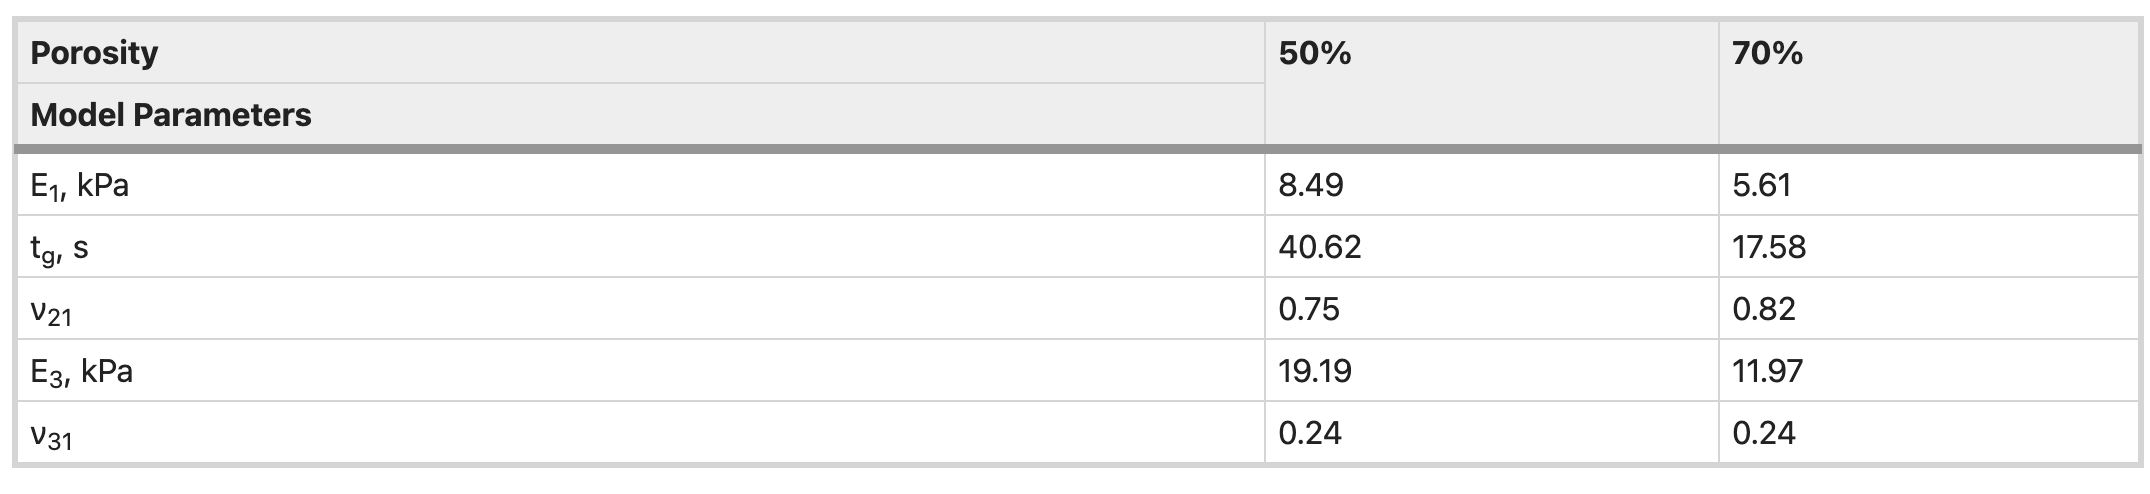

# Inversion Examples

## Simple Laplace Model Inversions

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

It took 0.0000 sec to evaluate the Laplace space func for 100 input s vals.
It took 0.0064 sec to numerically invert Laplace the func for 999 input times.


<IPython.core.display.Math object>

<IPython.core.display.Math object>

f(t)=(I1(sqrt(at)))(sqrt(at)), a=1


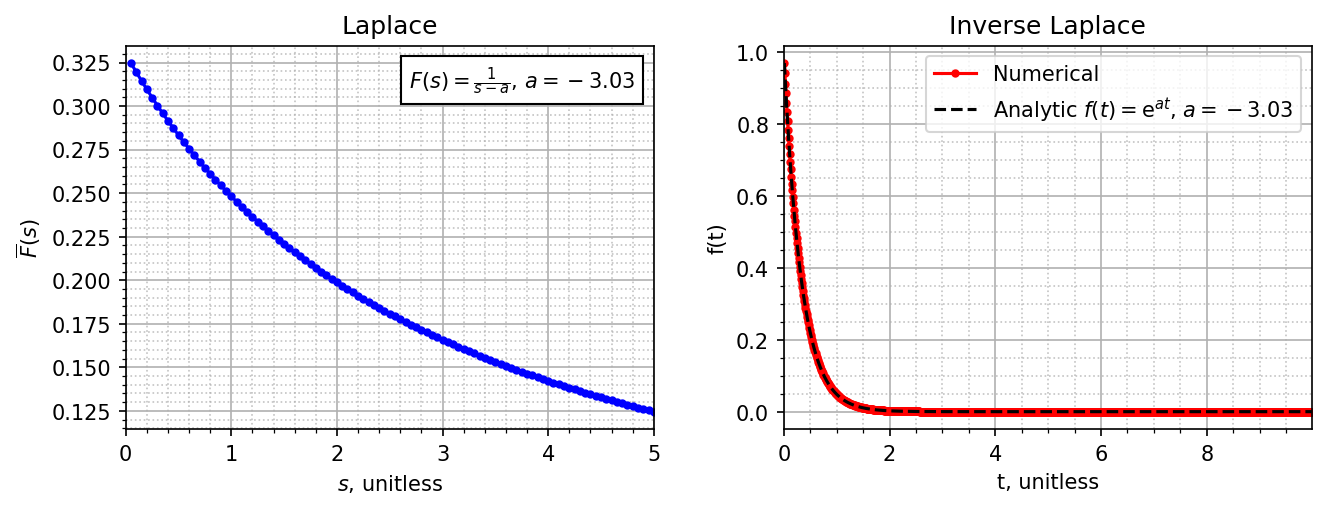

In [ ]:
#@markdown Simple Laplace - Numerical Inversion
importlib.reload(plotting)

file_prefix = "Eq A " #@param {type:"string"}

# \rm gives roman style letters, which is indicative of a constant
#@markdown $$ F(s)=\frac{1}{s-a} $$
#@markdown $$ f(t)={\mathrm{e}}^{a t}=\exp{\left(a t\right)} $$.
# inputting a value of time=0 doesn't error (just returns None/NaN), but takes longer (about 2x as much) on python; not really MATLAB though
plot_times  = np.arange(0.1,100,0.1)/100.0*10 
a = -3.03 #@param {type:"number"}
funcs = lambda s: 1/(s-a)
inv_funcs_anal = lambda t: np.exp(a*t)
plot_props = {
    "t":        {"y":{"name":r"f(t)"}, "x":{"name":r"t, unitless", "scale":"linear"}},
    "s":        {"y":{"name":r"$\overline{F}(s)$"},  "x":{"name":r"$s$, unitless"}, 
                 "eqn":{"text":r"$F(s)=\frac{1}{s-a}$, $a="+str(a)+r"$","annotate":True}},
    "t_anal":   {"eqn":{"text":r"$f(t)={\mathrm{e}}^{a t}$, $a="+str(a)+r"$"}},
}
input_s = np.arange(0.05, 5.05, 0.05)


_=plotting.plot_laplace_analysis(funcs=funcs, plot_props=plot_props, input_s=input_s, 
                                 plot_times=plot_times, inv_funcs_anal=inv_funcs_anal,
                                 plot_mode="simple")

display_equations(plot_props)
plt.savefig(get_path_to_save(plot_props, file_prefix), bbox_inches='tight')  # Include the bbox_inches='tight' is critical to ensure the saved images aren't cutoff while the colab images are normal

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

It took 0.0000 sec to evaluate the Laplace space func for 100 input s vals.
It took 0.0018 sec to numerically invert Laplace the func for 100 input times.


<IPython.core.display.Math object>

<IPython.core.display.Math object>

f(t)=(I1(sqrt(at)))(sqrt(at)), a=1


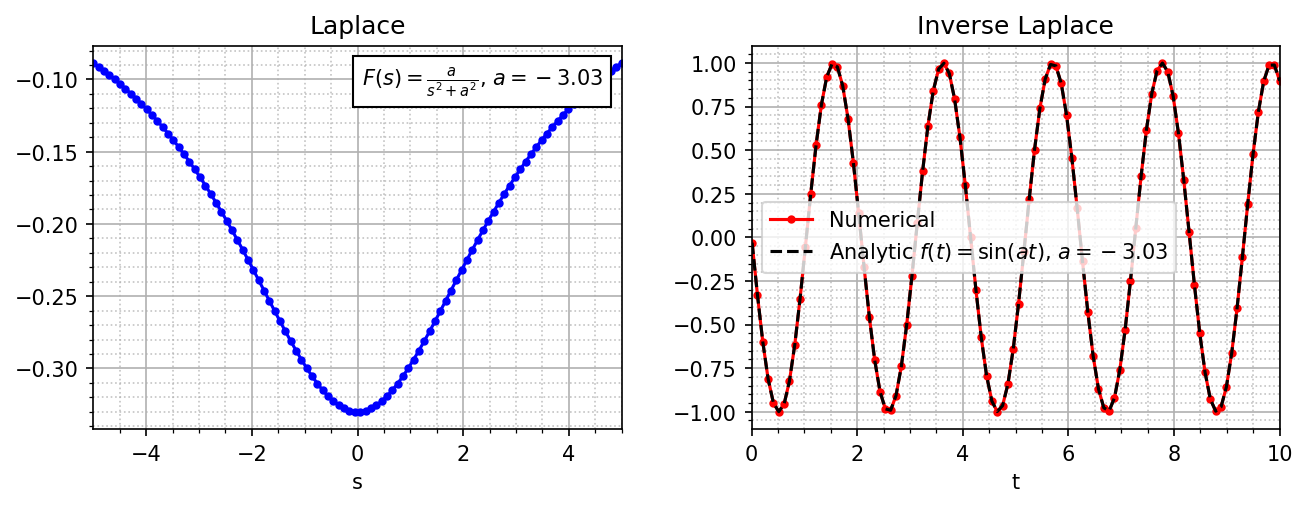

In [ ]:
#@markdown Simple Laplace - Numerical Inversion
importlib.reload(plotting)


file_prefix = "Eq B " #@param {type:"string"}


plot_times  = np.linspace(0.01,10,100,endpoint=True)
a = -3.03 #@param {type:"number"}
funcs = lambda s: a/(s*s+a*a)
inv_funcs_anal = lambda t: np.sin(a*t)
plot_props = {
    "s":        {"eqn":{"text":r"$F(s)=\frac{a}{s^2+a^2}$, $a="+str(a)+r"$","annotate":True}},
    "t_anal":   {"eqn":{"text":r"$f(t)=\sin{(at)}$, $a="+str(a)+r"$"}},
}
input_s = np.linspace(-5,5,100,endpoint=True)

_=plotting.plot_laplace_analysis(
    funcs=funcs, plot_props=plot_props, input_s=input_s, plot_times=plot_times, 
    inv_funcs_anal=inv_funcs_anal, plot_mode="simple")

display_equations(plot_props)
plt.savefig(get_path_to_save(plot_props, file_prefix), bbox_inches='tight')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

It took 0.0000 sec to evaluate the Laplace space func for 100 input s vals.
It took 0.0025 sec to numerically invert Laplace the func for 100 input times.


<IPython.core.display.Math object>

<IPython.core.display.Math object>

f(t)=(I1(sqrt(at)))(sqrt(at)), a=1


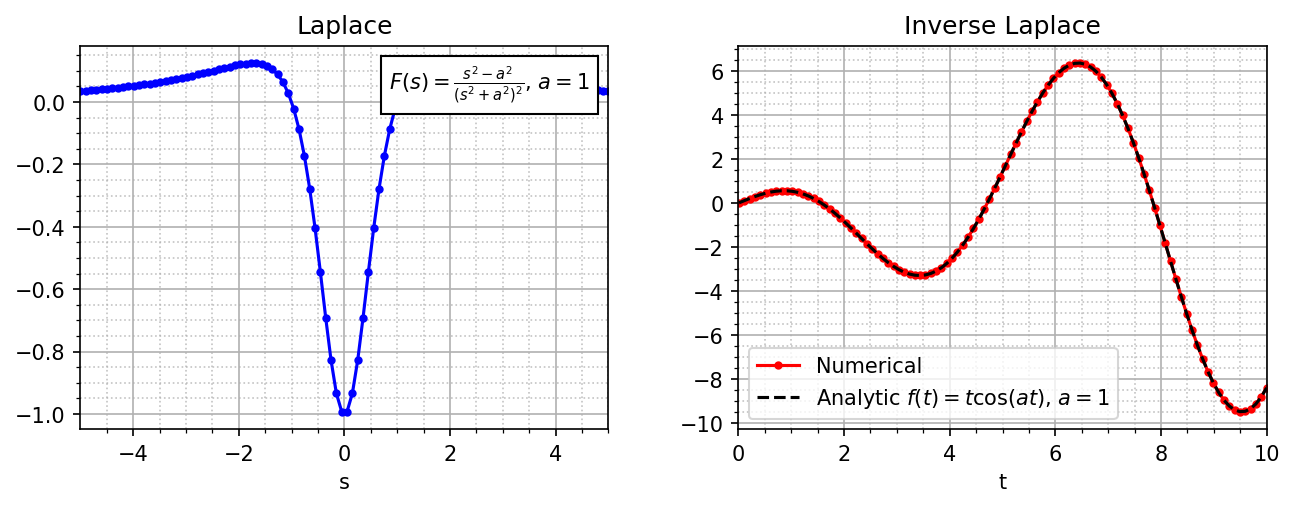

In [ ]:
#@markdown Simple Laplace - Numerical Inversion
importlib.reload(plotting)

file_prefix = "Eq C " #@param {type:"string"}

plot_times  = np.linspace(0.01,10,100,endpoint=True)
a = 1  #@param {type:"number"}
funcs = lambda s: (s*s-a*a)/((s*s+a*a)*(s*s+a*a))
inv_funcs_anal = lambda t: t*np.cos(a*t)
plot_props = {
    "s":        {"eqn":{"text":r"$F(s)=\frac{s^2-a^2}{(s^2+a^2)^2}$, $a="+str(a)+r"$","annotate":True}},
    "t_anal":   {"eqn":{"text":r"$f(t)=t\cos{(at)}$, $a="+str(a)+r"$"}},
}
input_s = np.linspace(-5,5,100,endpoint=True)

_=plotting.plot_laplace_analysis(
    funcs=funcs, plot_props=plot_props, input_s=input_s, plot_times=plot_times, 
    inv_funcs_anal=inv_funcs_anal, plot_mode="simple")

display_equations(plot_props)
plt.savefig(get_path_to_save(plot_props, file_prefix), bbox_inches='tight')

Laplace transform of bessel functions
http://eqworld.ipmnet.ru/en/auxiliary/inttrans/laplace8.pdf 
Per pdf: Copyright °c 2005 Andrei D. Polyanin

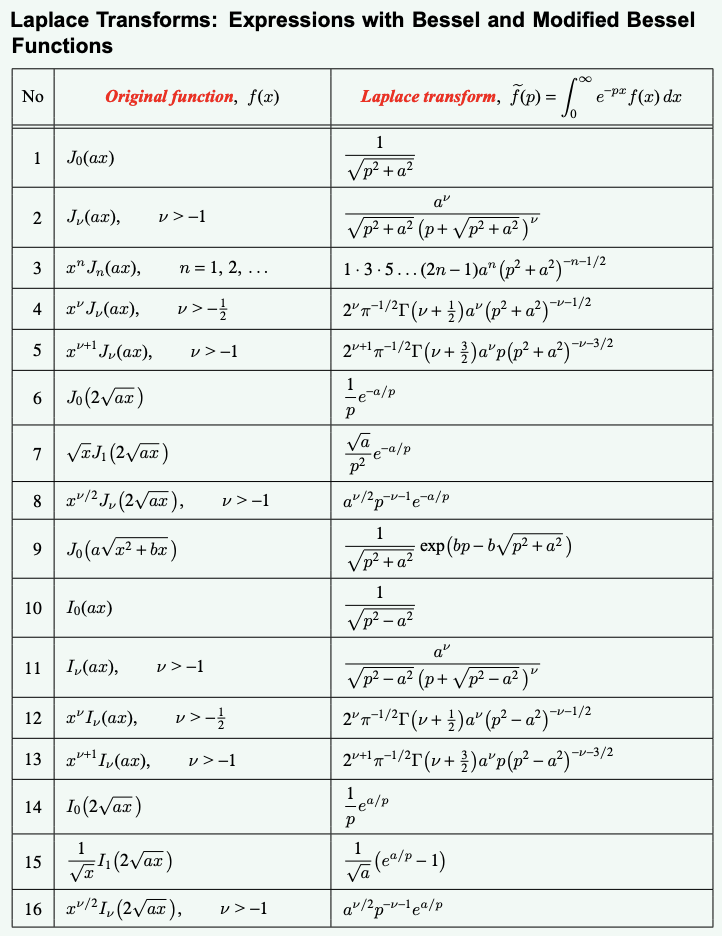

## Medium Level Laplace Inversions (Including bessel functions)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

It took 0.0010 sec to evaluate the Laplace space func for 1000 input s vals.
It took 0.0031 sec to numerically invert Laplace the func for 100 input times.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


<IPython.core.display.Math object>

<IPython.core.display.Math object>

f(t)=(I1(sqrt(at)))(sqrt(at)), a=1


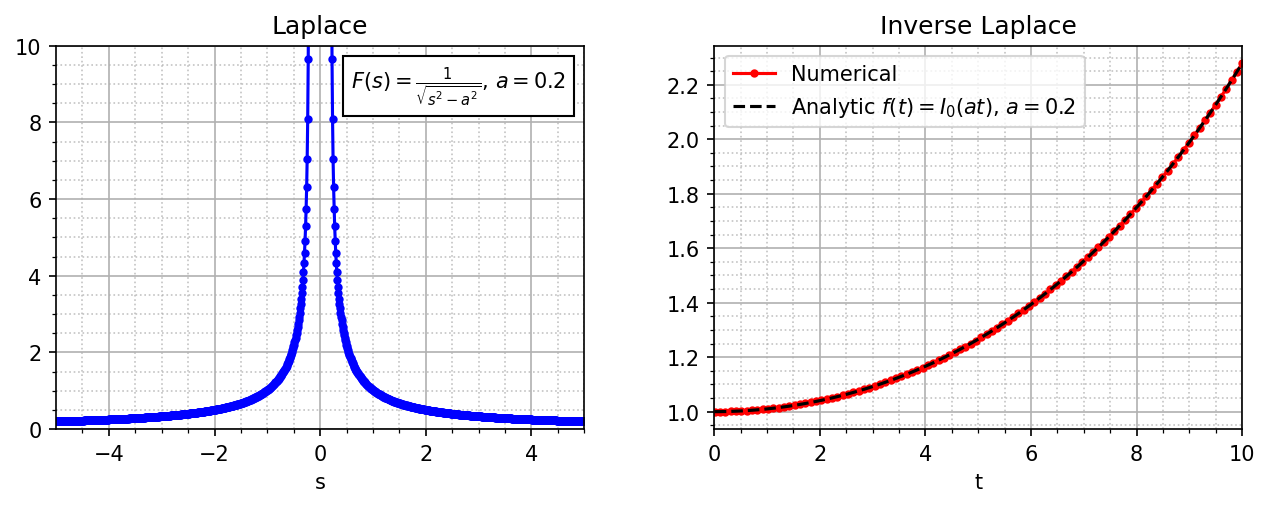

In [ ]:
#@markdown Simple Laplace - Numerical Inversion
importlib.reload(plotting)

file_prefix = "Eq D " #@param {type:"string"}

plot_times  = np.linspace(0.01,10,100,endpoint=True)
a = 0.2  #@param {type:"number"}
funcs = lambda s: 1/np.sqrt(s*s-a*a)
inv_funcs_anal = lambda t: sp.special.iv(0, a*t)
plot_props = {
    "s":        {"eqn":{"text":r"$F(s)=\frac{1}{\sqrt{s^2-a^2}}$, $a="+str(a)+r"$","annotate":True}},
    "t_anal":   {"eqn":{"text":r"$f(t)=I_0(at)$, $a="+str(a)+r"$"}},
}
input_s = np.linspace(-5,5,1000,endpoint=True)

fig, axs, _, _, _ \
  = plotting.plot_laplace_analysis(
    funcs=funcs, plot_props=plot_props, input_s=input_s, plot_times=plot_times, 
    inv_funcs_anal=inv_funcs_anal, plot_mode="simple")

axs[0].set_ylim(0,10)

display_equations(plot_props)
plt.savefig(get_path_to_save(plot_props, file_prefix), bbox_inches='tight')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

It took 0.0001 sec to evaluate the Laplace space func for 1000 input s vals.
It took 0.0033 sec to numerically invert Laplace the func for 100 input times.


<IPython.core.display.Math object>

<IPython.core.display.Math object>

f(t)=(I1(sqrt(at)))(sqrt(at)), a=1


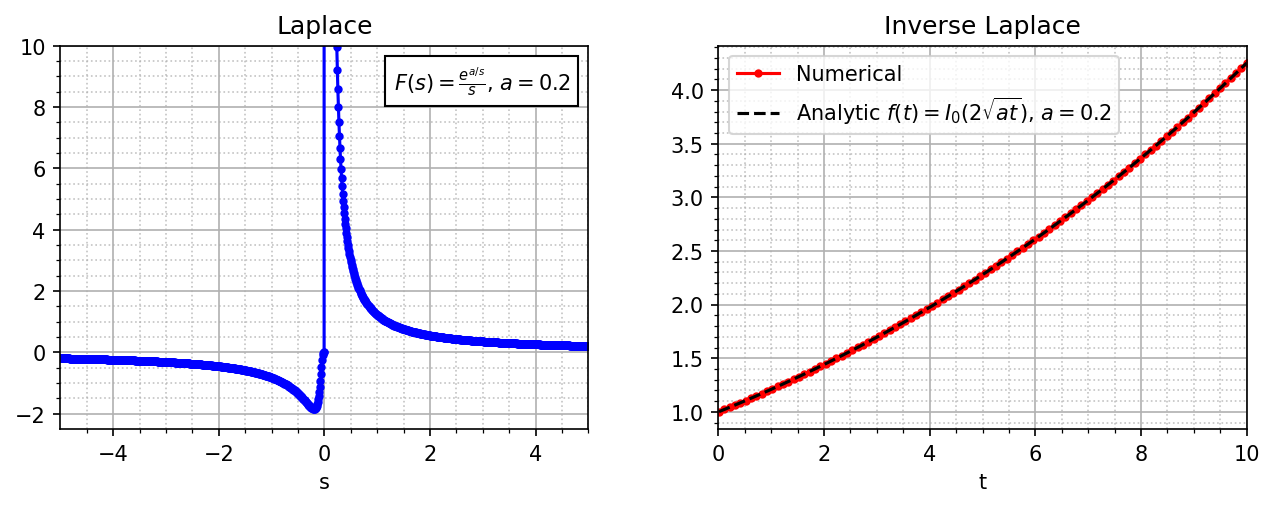

In [ ]:
#@markdown Simple Laplace - Numerical Inversion
importlib.reload(plotting)

file_prefix = "Eq E " #@param {type:"string"}

plot_times  = np.linspace(0.01,10,100,endpoint=True)
a = 0.2  #@param {type:"number"}
funcs = lambda s: np.exp(a/s)/s
inv_funcs_anal = lambda t: sp.special.iv(0, 2*np.sqrt(a*t) )
plot_props = {
    "s":        {"eqn":{"text":r"$F(s)=\frac{e^{a/s}}{s}$, $a="+str(a)+r"$","annotate":True}},
    "t_anal":   {"eqn":{"text":r"$f(t)=I_0(2\sqrt{at})$, $a="+str(a)+r"$"}},
}
input_s = np.linspace(-5,5,1000,endpoint=True)
#input_s = np.concatenate([np.linspace(-5,-0.2,100,endpoint=True), np.linspace(0.2,5,100,endpoint=True)])

fig, axs, _, _, _ \
  = plotting.plot_laplace_analysis(
    funcs=funcs, plot_props=plot_props, input_s=input_s, plot_times=plot_times, 
    inv_funcs_anal=inv_funcs_anal, plot_mode="simple")

axs[0].set_ylim(-2.5,10)

display_equations(plot_props)
plt.savefig(get_path_to_save(plot_props, file_prefix), bbox_inches='tight')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

It took 0.0000 sec to evaluate the Laplace space func for 1000 input s vals.
It took 0.0030 sec to numerically invert Laplace the func for 100 input times.


<IPython.core.display.Math object>

<IPython.core.display.Math object>

f(t)=(I1(sqrt(at)))(sqrt(at)), a=1


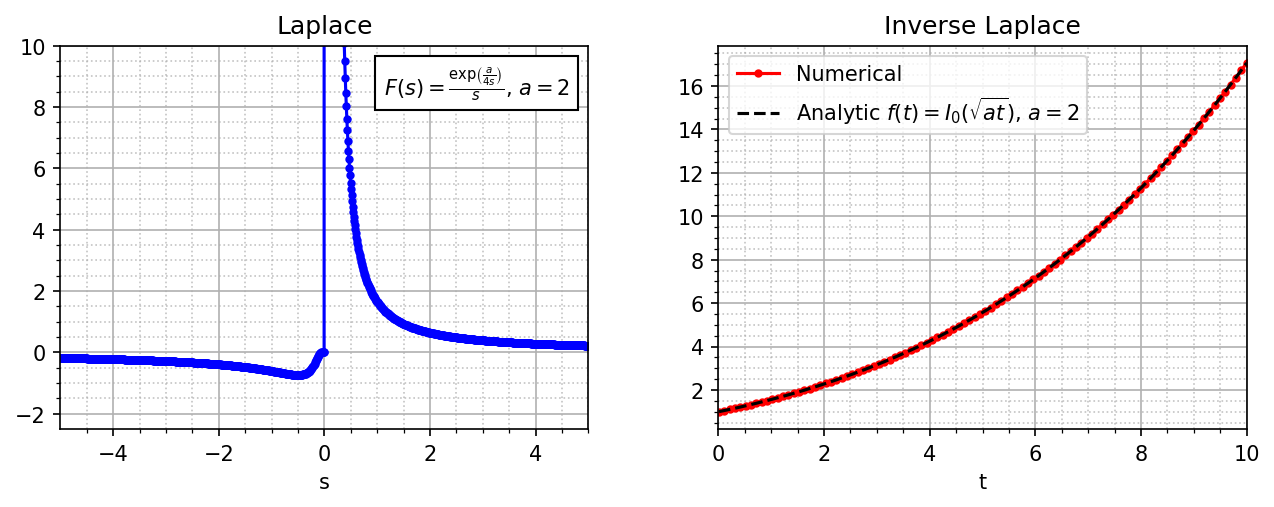

In [ ]:
#@markdown Simple Laplace - Numerical Inversion
importlib.reload(plotting)

file_prefix = "Eq F " #@param {type:"string"}

plot_times  = np.linspace(0.01,10,100,endpoint=True)
a = 2  #@param {type:"number"}
funcs = lambda s: np.exp(a/(4*s))/s
inv_funcs_anal = lambda t: sp.special.iv(0, np.sqrt(a*t) )
plot_props = {          
    "s":        {"eqn":{"text":r"$F(s)=\frac{\exp{\left(\frac{a}{4s}\right) }}{s}$, $a="+str(a)+r"$","annotate":True}},
    "t_anal":   {"eqn":{"text":r"$f(t)=I_0(\sqrt{at})$, $a="+str(a)+r"$"}},
}
input_s = np.linspace(-5,5,1000,endpoint=True)
#input_s = np.concatenate([np.linspace(-5,-0.2,100,endpoint=True), np.linspace(0.2,5,100,endpoint=True)])

fig, axs, _, _, _ \
  = plotting.plot_laplace_analysis(
    funcs=funcs, plot_props=plot_props, input_s=input_s, plot_times=plot_times, 
    inv_funcs_anal=inv_funcs_anal, plot_mode="simple")

axs[0].set_ylim(-2.5,10)

display_equations(plot_props)
plt.savefig(get_path_to_save(plot_props, file_prefix), bbox_inches='tight')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

It took 0.0001 sec to evaluate the Laplace space func for 1000 input s vals.
It took 0.0036 sec to numerically invert Laplace the func for 100 input times.


<IPython.core.display.Math object>

<IPython.core.display.Math object>

f(t)=(I1(sqrt(at)))(sqrt(at)), a=1


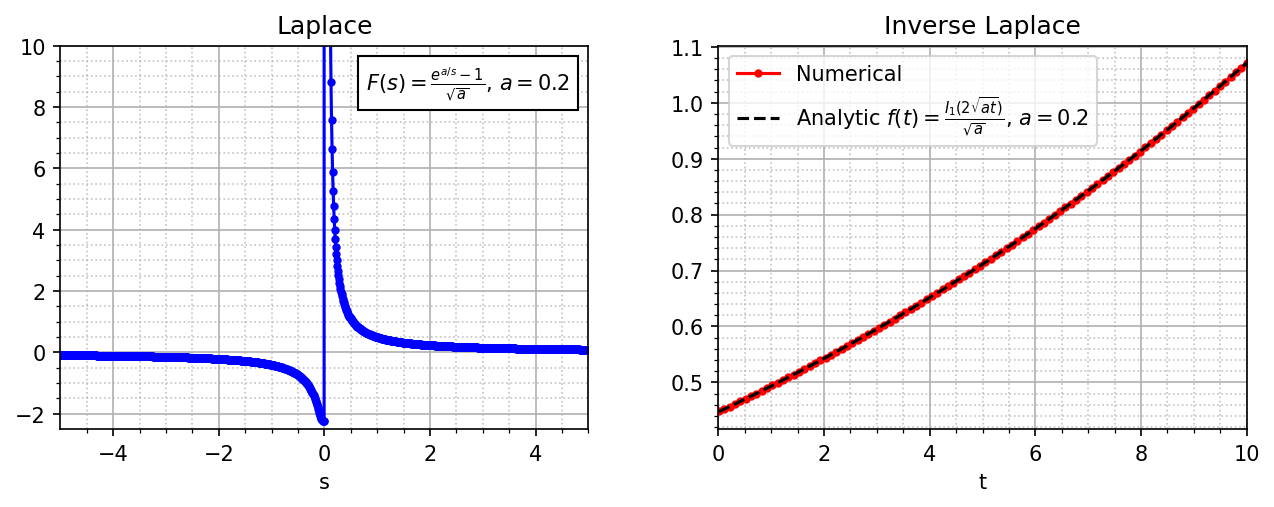

In [ ]:
#@markdown Simple Laplace - Numerical Inversion
importlib.reload(plotting)

file_prefix = "Eq G " #@param {type:"string"}

plot_times  = np.linspace(0.01,10,100,endpoint=True)
a = 0.2  #@param {type:"number"}
funcs = lambda s: (np.exp(a/s)-1)/np.sqrt(a)
inv_funcs_anal = lambda t: sp.special.iv(1, 2*np.sqrt(a*t) ) / np.sqrt(t)
plot_props = {
    "s":        {"eqn":{"text":r"$F(s)=\frac{e^{a/s}-1}{\sqrt{a}}$, $a="+str(a)+r"$","annotate":True}},
    "t_anal":   {"eqn":{"text":r"$f(t)=\frac{I_1(2\sqrt{at})}{\sqrt{a}}$, $a="+str(a)+r"$"}},
}
input_s = np.linspace(-5,5,1000,endpoint=True)

fig, axs, _, _, _ \
  = plotting.plot_laplace_analysis(
    funcs=funcs, plot_props=plot_props, input_s=input_s, plot_times=plot_times, 
    inv_funcs_anal=inv_funcs_anal, plot_mode="simple")

axs[0].set_ylim(-2.5,10)

display_equations(plot_props)
plt.savefig(get_path_to_save(plot_props, file_prefix), bbox_inches='tight')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

It took 0.0001 sec to evaluate the Laplace space func for 1000 input s vals.
It took 0.0018 sec to numerically invert Laplace the func for 100 input times.


<IPython.core.display.Math object>

<IPython.core.display.Math object>

f(t)=(I1(sqrt(at)))(sqrt(at)), a=1


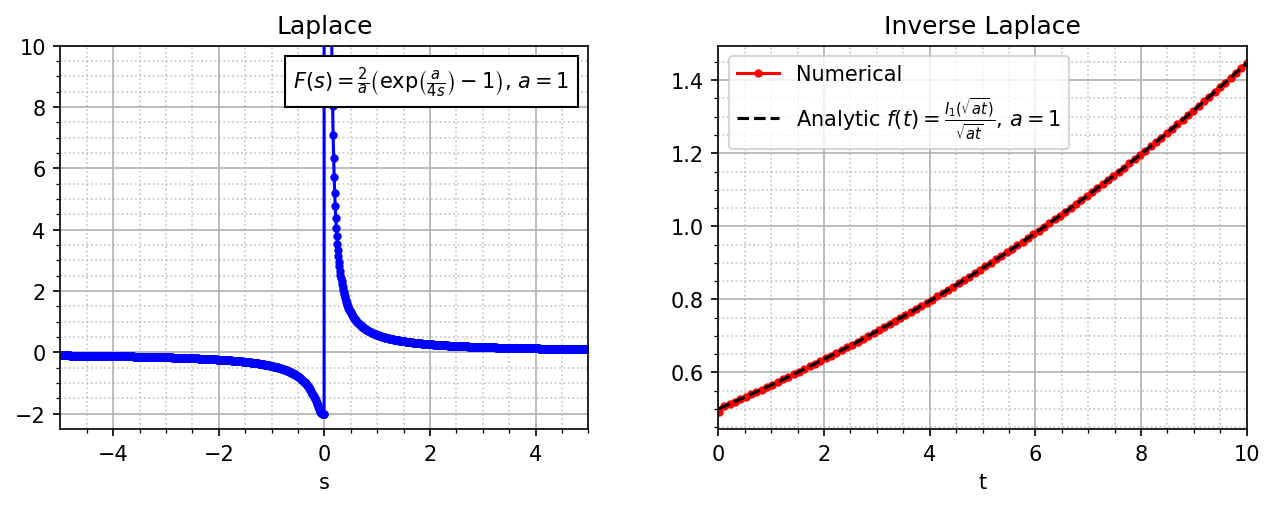

In [ ]:
#@markdown Simple Laplace - Numerical Inversion
importlib.reload(plotting)

file_prefix = "Eq H " #@param {type:"string"}

plot_times  = np.linspace(0.01,10,100,endpoint=True)
a = 1  #@param {type:"number"}
funcs = lambda s: (np.exp(a/s/4)-1)/ (0.5*a)
inv_funcs_anal = lambda t: sp.special.iv(1, np.sqrt(a*t) ) / (np.sqrt(a*t))
plot_props = {
    "s":        {"eqn":{"text":r"$F(s)=\frac{2}{a}\left(\exp{\left(\frac{a}{4s}\right)}-1\right)$, $a="+str(a)+r"$","annotate":True}},
    "t_anal":   {"eqn":{"text":r"$f(t)=\frac{I_1(\sqrt{at})}{\sqrt{at}}$, $a="+str(a)+r"$"}},
}
input_s = np.linspace(-5,5,1000,endpoint=True)
#input_s = np.concatenate([np.linspace(-5,-0.2,100,endpoint=True), np.linspace(0.2,5,100,endpoint=True)])

fig, axs, _, _, _ \
  = plotting.plot_laplace_analysis(
    funcs=funcs, plot_props=plot_props, input_s=input_s, plot_times=plot_times, 
    inv_funcs_anal=inv_funcs_anal, plot_mode="simple")

axs[0].set_ylim(-2.5,10)

display_equations(plot_props)
plt.savefig(get_path_to_save(plot_props, file_prefix), bbox_inches='tight')

Got below two inversions from Abate 2006 paper describing the numerical inversion methods.   

Abate, Joseph, and Ward Whitt. "A Unified Framework for Numerically Inverting Laplace Transforms." *INFORMS Journal of Computing,* vol. 18.4 (2006): 408-421. Print. Online version of the paper can be found at:
* http://www.columbia.edu/~ww2040/allpapers.html
* http://www.columbia.edu/~ww2040/AbateUnified2006.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

It took 0.0001 sec to evaluate the Laplace space func for 1000 input s vals.
It took 0.0028 sec to numerically invert Laplace the func for 100 input times.


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py:2817: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


<IPython.core.display.Math object>

<IPython.core.display.Math object>

f(t)=(I1(sqrt(at)))(sqrt(at)), a=1


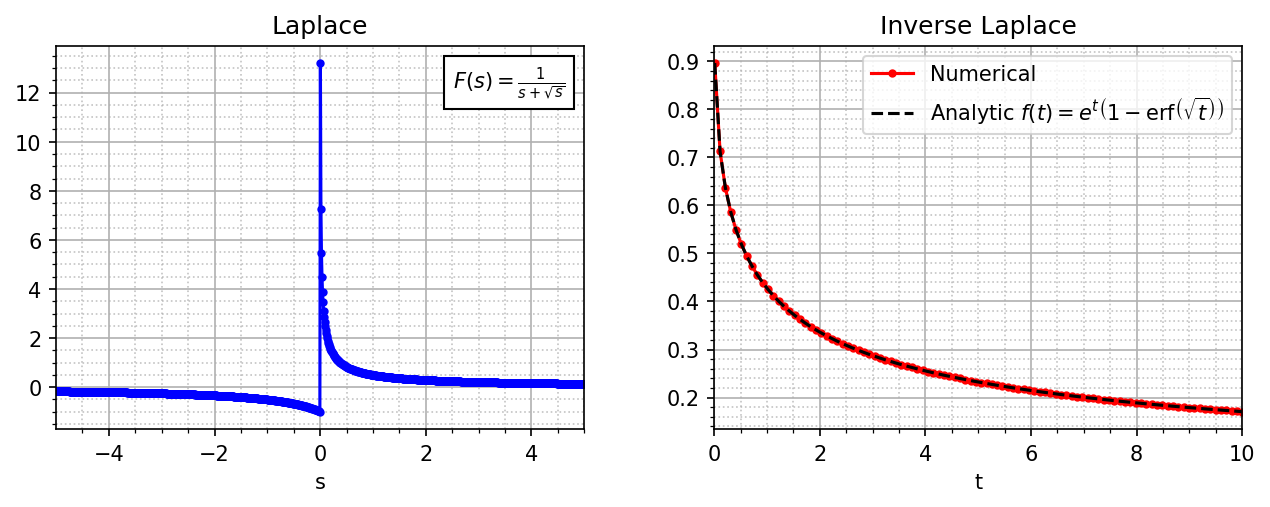

In [ ]:
#@markdown Simple Laplace - Numerical Inversion
importlib.reload(plotting)

file_prefix = "Eq I " #@param {type:"string"}

plot_times  = np.linspace(0.01,10,100,endpoint=True)
funcs = lambda s: 1/(s+np.sqrt(s))
inv_funcs_anal = lambda t: np.exp(t) * sp.special.erfc(np.sqrt(t)) #erfc = 1-erf (complementary error function)
plot_props = {
    "s":        {"eqn":{"text":r"$F(s)=\frac{1}{s+\sqrt{s}}$","annotate":True}},
    "t_anal":   {"eqn":{"text":r"$f(t)=e^{t} \left( 1-\mathrm{erf}\left(\sqrt{t}\right)\right)$"}},
}
input_s = np.linspace(-5,5,1000,endpoint=True)+0j

fig, axs, _, _, _ \
  = plotting.plot_laplace_analysis(
    funcs=funcs, plot_props=plot_props, input_s=input_s, plot_times=plot_times, 
    inv_funcs_anal=inv_funcs_anal, plot_mode="simple")

display_equations(plot_props)
plt.savefig(get_path_to_save(plot_props, file_prefix), bbox_inches='tight')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

It took 0.0001 sec to evaluate the Laplace space func for 1000 input s vals.
It took 0.0032 sec to numerically invert Laplace the func for 100 input times.


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py:2817: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


<IPython.core.display.Math object>

<IPython.core.display.Math object>

f(t)=(I1(sqrt(at)))(sqrt(at)), a=1


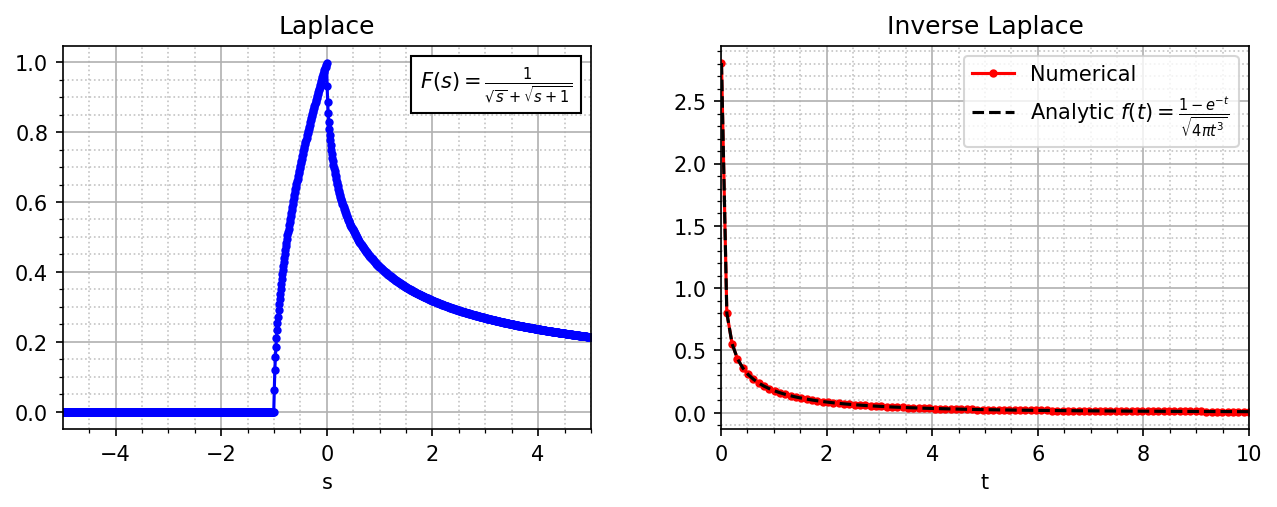

In [ ]:
#@markdown Simple Laplace - Numerical Inversion
importlib.reload(plotting)

file_prefix = "Eq J " #@param {type:"string"}

plot_times  = np.linspace(0.01,10,100,endpoint=True)
funcs = lambda s: 1/(np.sqrt(s)+np.sqrt(s+1))
inv_funcs_anal = lambda t: (1-np.exp(-t))/ np.sqrt(4*np.pi*t*t*t)
plot_props = {
    "s":        {"eqn":{"text":r"$F(s)=\frac{1}{\sqrt{s}+\sqrt{s+1}}$","annotate":True}},
    "t_anal":   {"eqn":{"text":r"$f(t)=\frac{1-e^{-t}}{\sqrt{4\pi t^3}}$"}},
}
input_s = np.linspace(-5,5,1000,endpoint=True)+0j

fig, axs, _, _, _ \
  = plotting.plot_laplace_analysis(
    funcs=funcs, plot_props=plot_props, input_s=input_s, plot_times=plot_times, 
    inv_funcs_anal=inv_funcs_anal, plot_mode="simple")

display_equations(plot_props)
plt.savefig(get_path_to_save(plot_props, file_prefix), bbox_inches='tight')

## ViscoporoelasticModel0 inversion

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

It took 0.0026 sec to evaluate the Laplace space func for 100 input s vals.
It took 0.0606 sec to numerically invert Laplace the func for 100 input times.


,Value,Category
eps0,0.10,Constant
strain_rate,0.10,Constant
Vrz,0.24,Constant
Ezz,19.19,Constant
c,0.00,FittedParam
tau1,0.00,FittedParam
tau2,0.00,FittedParam
time_const,40.62,FittedParam
Vrtheta,0.75,FittedParam
Err,8.49,FittedParam


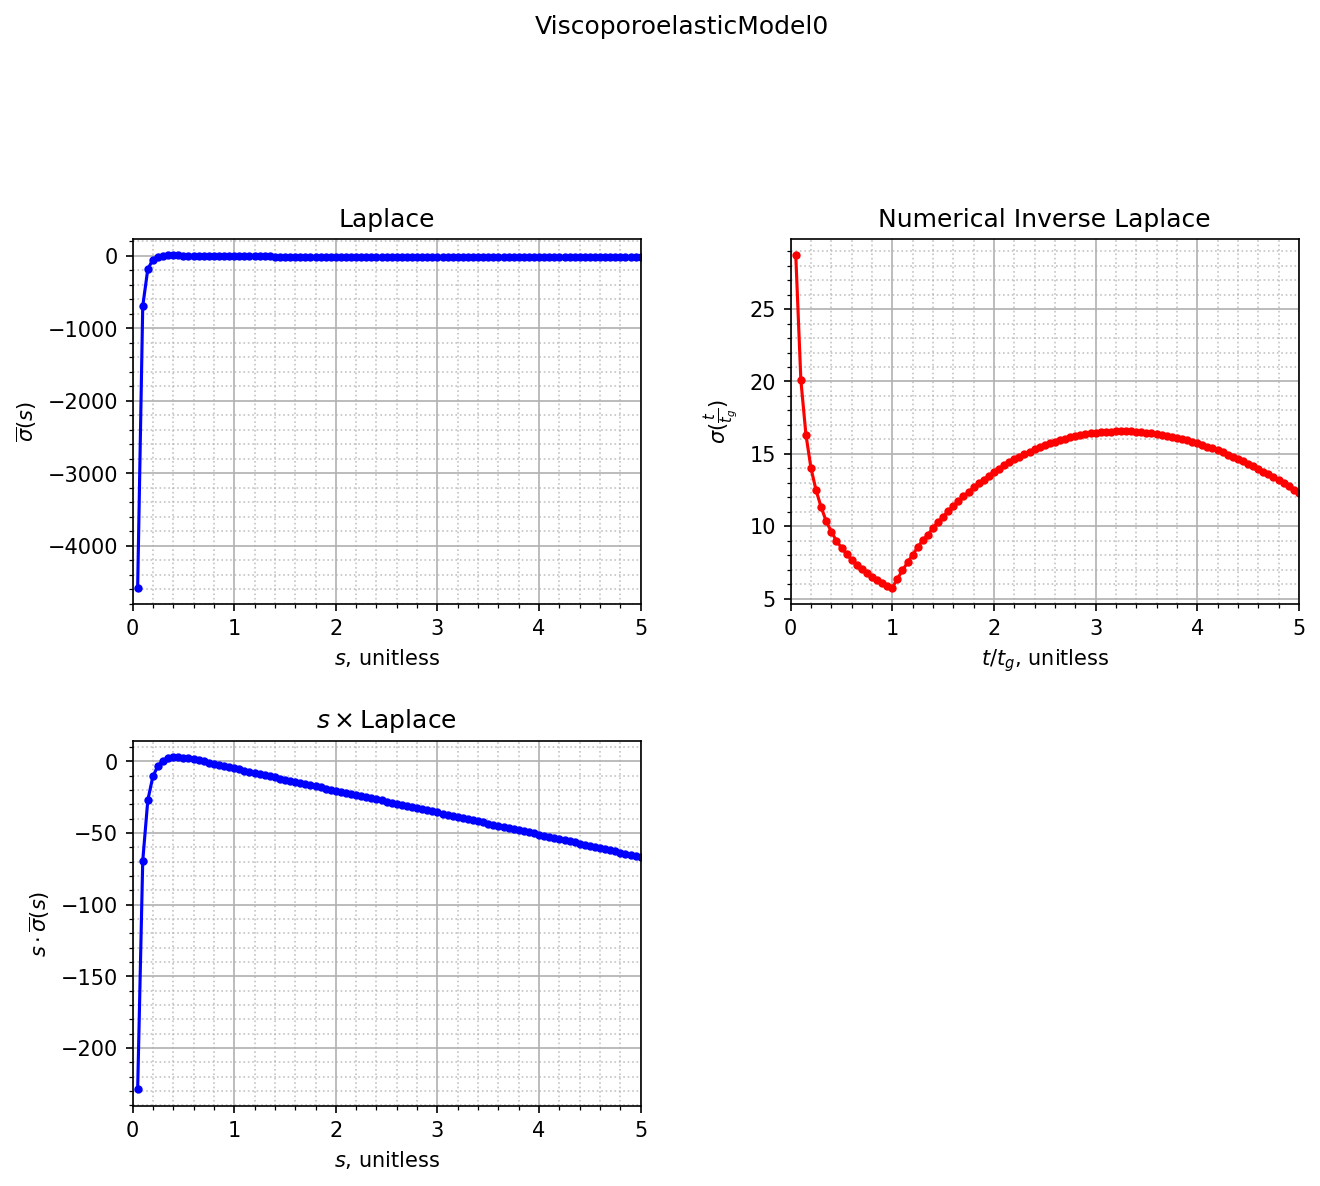

In [ ]:
#@markdown ViscoporoelasticModel0 - Numerical Inversion

import time as timer

importlib.reload(plotting)
importlib.reload(viscoporoelastic_model)

t1=timer.time();

#@markdown Predefined constants
ViscoporoelasticModel0.eps0 = 0.1 #@param {type:"number"} ; # 10 percent
ViscoporoelasticModel0.strain_rate = 0.1 #@param {type:"number"} ; # 1 percent per s (normally 1#/s)
## Below are directly determined by the mesh deformation part of the
## experiment (see our paper with Daniel).  -Dr. Spector
ViscoporoelasticModel0.Vrz = 0.24 #@param {type:"number"} ; # Not actually v, but greek nu (represents Poisson's ratio)
ViscoporoelasticModel0.Ezz =   19.19#@param {type:"number"} ; # Note- don't mix up Ezz with epszz

vpe = ViscoporoelasticModel0()
tg = vpe.tg
#@markdown Fitted parameters (to be determined by experimental fitting to the unknown material)
## Fitted parameters (to be determined by experimental fitting to
# the unknown material)
vpe.c =   0#@param {type:"number"} ;
vpe.tau1 =  0#@param {type:"number"} ;
vpe.tau2 =  0#@param {type:"number"} ;
#tau = [tau1, tau2];
#tau = [1 1];
vpe.tg=40.62 #@param {type:"number"}; #in units of s   # for porosity_sp == 0.5
vpe.Vrtheta =  0.75#@param {type:"number"}; # Not actually v, but greek nu (represents Poisson's ratio)
vpe.Err =  8.49#@param {type:"number"};

tg = vpe.tg



# inputting a value of time=0 doesn't error (just returns None/NaN), but takes longer (about 2x as much) on python; not really MATLAB though
input_times = np.linspace(0.05, 5.0, num=100, endpoint=True) * tg
plot_times  = input_times
funcs = vpe.laplace_value
func_name = {"t":r"$\sigma(\frac{t}{t_g})$", "s":r"$\overline{\sigma}(s)$"}
x_names   = {"t":r"$t/t_g$, unitless", "s":r"$s$, unitless"}
input_s = np.linspace(0.05, 5.0, num=100, endpoint=True)

fig, axs, laplace_vals, inverted_vals_numerical, inverted_vals_analytical=plotting.plot_laplace_analysis(
    funcs=funcs, func_name=func_name, x_names=x_names, input_s=input_s, 
    input_times=input_times, plot_times=plot_times, time_const=tg, model_name = vpe.get_model_name())

display(vpe.get_var_df())

## Test Model 1 - Numerical Inversion

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Time taken in sec: 0.009364843368530273
       alpha  ...                             _abc_impl
value    0.5  ...  <_abc_data object at 0x7f1a580a4090>

[1 rows x 7 columns]


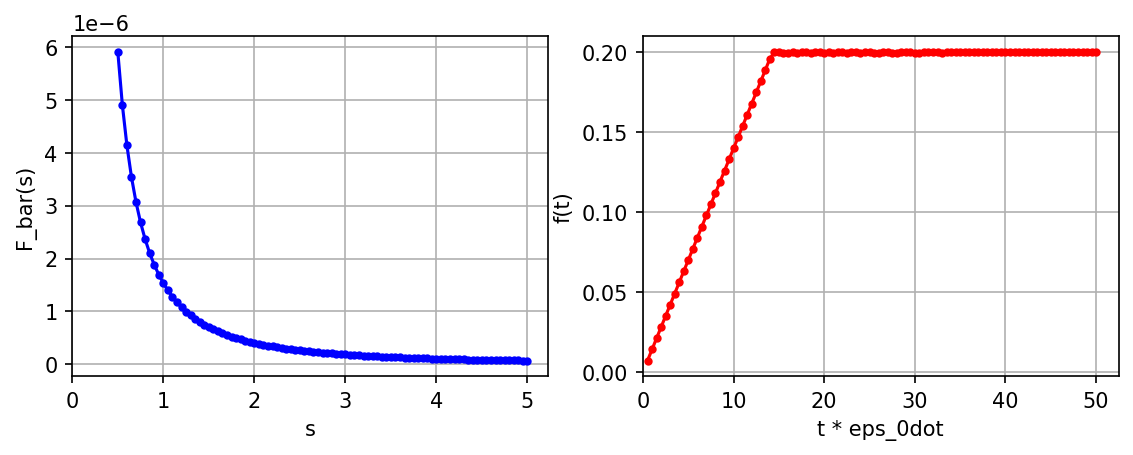

In [ ]:
#@markdown Test Model - Numerical Inversion

# inputting a value of time=0 doesn't error (just returns None/NaN), but takes longer (about 2x as much) on python; not really MATLAB though
times=np.array([2,3])
times = np.arange(0.05, 5.05, 0.05)*100000

tm = viscoporoelastic_model.TestModel1()
func = tm.laplace_value
input_times = times
plot_times  = times * tm.strain_rate
func_name = {"t":"f(t)", "s":"F_bar(s)"}
x_names   = {"t":"t * eps_0dot", "s":"s"}
input_s = np.arange(0.5, 5.05, 0.05)


import time as timer
t1=timer.time();
inverted_vals_numerical=euler_inversion(func, input_times)
t2=timer.time()-t1
print("Time taken in sec:", t2)

#%%
# Non-positive s values give an error "invalid value encountered in sqrt"
laplace_vals = func(input_s)

##%%
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2)
fig.set_figwidth(9)
fig.set_figheight(3)
fig.set_dpi(150)

axs[0].plot(input_s, laplace_vals, ".-b")
axs[0].set_xlabel(x_names["s"])
# theoretically, there should be no limit on s, but non-positive values throw an error in the function
axs[0].set_xlim([0, None])
axs[0].set_ylabel(func_name["s"])
axs[0].grid()

axs[1].plot(plot_times, inverted_vals_numerical, ".-r")
axs[1].set_xlabel(x_names["t"])
axs[1].set_xlim([0, None])
axs[1].set_ylabel(func_name["t"])    
axs[1].grid()

#axs[0].show()

fig.show()

vars={key:value for key,value in viscoporoelastic_model.TestModel1.__dict__.items() if not key.startswith("__") and not callable(value)}
print(pd.DataFrame(vars,index=["value"]))

## Test Model 2 - Numerical & Analytical Inversion

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

It took 0.0007 sec to evaluate the Laplace space func for 299 input s vals.
It took 0.1055 sec to numerically invert Laplace the func for 399 input times.


,t/tg,f(t)_Numerical,f(t)_Analytic
0,0.01,2.045627e-08,-0.587811
1,0.02,4.044276e-08,-0.558588
2,0.03,6.011270e-08,-0.535413
3,0.04,7.952132e-08,-0.516464
4,0.05,9.870091e-08,-0.500551
...,...,...,...
394,3.95,5.705000e-06,-0.198084
395,3.96,5.719000e-06,-0.198081
396,3.97,5.732999e-06,-0.198078
397,3.98,5.747000e-06,-0.198075


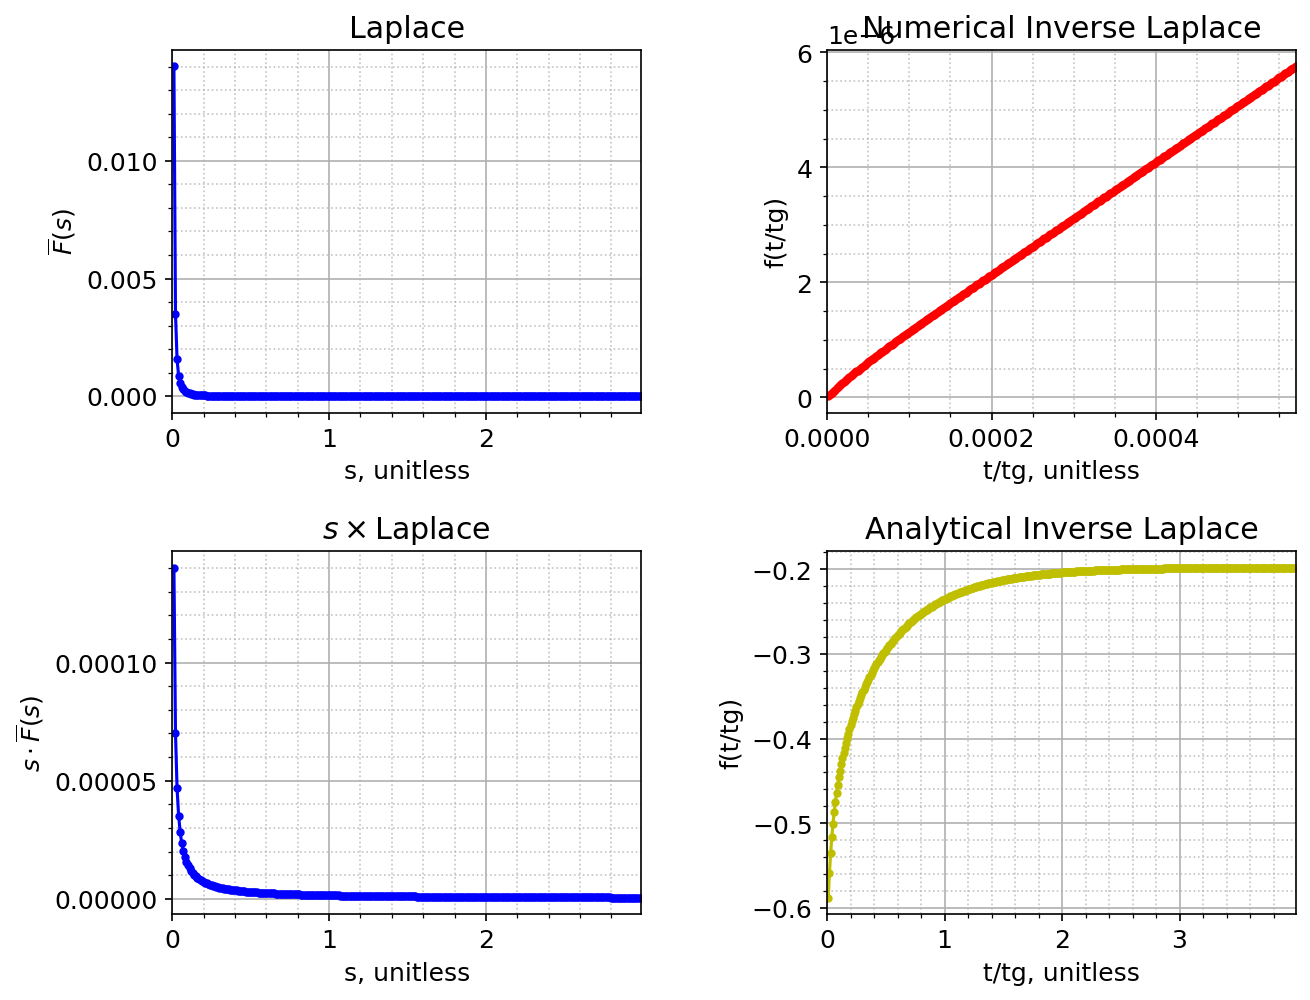

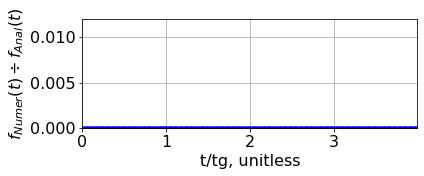

In [ ]:
#@markdown Test Model 2 - Numerical & Analytical Inversion

importlib.reload(plotting)
importlib.reload(viscoporoelastic_model)

#anal_offset = 1/7000.0 #0.0001
anal_offset = 1



tm = viscoporoelastic_model.TestModel2()
tg = tm.tg

# inputting a value of time=0 doesn't error (just returns None/NaN), but takes longer (about 2x as much) on python; not really MATLAB though
#times=np.arange(0.1,100,0.1)/100.0
#times = np.arange(0.05, 5.05, 0.05)
#times=np.arange(0.001,2,0.01)
times=np.arange(100,7000*4,100)
times=np.arange(0.01,4,0.01)*tg

funcs = tm.laplace_value
#funcs = lambda s: tm.laplace_value(s)*s
input_times = times
plot_times  = times/tg 
func_name = {"t":"f(t/tg)", "s":r"$\overline{F}(s)$","t_anal":f"f(t/tg), {tm.inverted_value_units()}"}
#func_name = {"t":"f(t/tg)", "s":r"$s\cdot\overline{F}(s)$","t_anal":f"f(t/tg), {tm.inverted_value_units()}"}
#func_name = {"t":"f(t)", "s":"F_bar(s)","t_anal":"f(t*0.01)*0.01"}
x_names   = {"t":"t/tg, unitless", "s":"s, unitless","t_anal":"t/tg, unitless"}
input_s = np.arange(0.01, 3.0, 0.01)
inv_funcs_anal = tm.inverted_value  #lambda t: tm.inverted_value(t*0.01)*0.01
#inv_func_anal = lambda t: tm.inverted_value(t/0.00001)/100
#inv_func_anal = lambda t: tm.inverted_value(t)/100
input_times_anal = input_times /anal_offset
plot_times_anal = plot_times /anal_offset

plt.rc('font', size=12)  # default font size is 10
fig, axs, laplace_vals, inverted_vals_numerical, inverted_vals_analytical=plotting.plot_laplace_analysis(
    funcs=func, func_name=func_name, x_names=x_names, input_s=input_s, 
    input_times=input_times, plot_times=plot_times, tg=tg,
    input_times_anal=input_times_anal, plot_times_anal=plot_times_anal, 
    inv_funcs_anal=inv_funcs_anal, Marg=32 )


plt.figure(figsize=(6, 2))
plt.rc('font', size=16)  # default font size is 10
plt.grid()
plt.plot(plot_times,inverted_vals_numerical/inverted_vals_analytical, ".-b")
#plt.plot(inverted_vals_numerical,inverted_vals_analytical)
plt.xlim([0, max(plot_times)])
plt.ylim([0, 0.012])
plt.xlabel("t/tg, unitless")
#plt.ylabel(r"$\frac{f_{Numer}(t)}{f_{Anal}(t)}$")
plt.ylabel(r"$f_{Numer}(t) \div f_{Anal}(t)$")

#vars={key:value for key,value in viscoporoelastic_model.TestModel2.__dict__.items() if not key.startswith("__") and not callable(value)}
#print(pd.DataFrame(vars,index=["value"]))

#print(inverted_vals_numerical)

# creating a DataFrame
dict = {'t/tg' : plot_times,
        'f(t)_Numerical' : inverted_vals_numerical,
        'f(t)_Analytic' : inverted_vals_analytical}
df = pd.DataFrame(dict)
  
# displaying the DataFrame
display(df)

## Test Model 3 - Numerical & Analytical Inversion


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

It took 0.0007 sec to evaluate the Laplace space func for 299 input s vals.
It took 0.0726 sec to numerically invert Laplace the func for 279 input times.


Text(0, 0.5, '$f_{Numer}(t) \\div f_{Anal}(t)$')

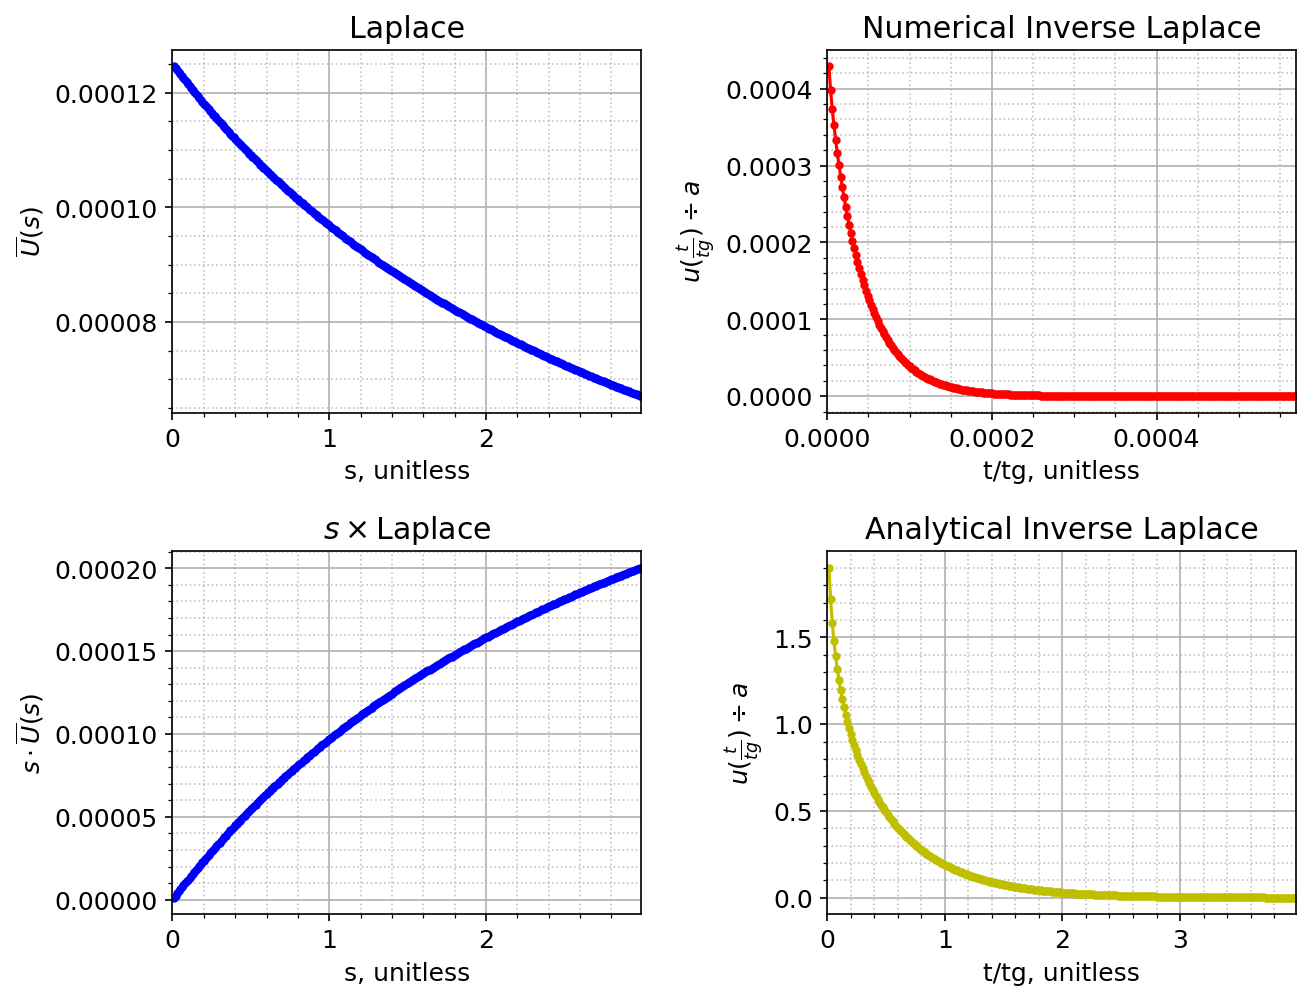

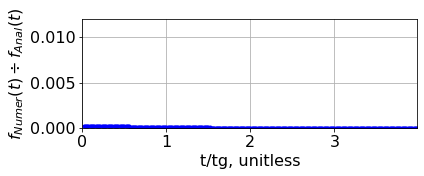

In [ ]:
#@markdown Test Model 3 - Numerical & Analytical Inversion

importlib.reload(plotting)
importlib.reload(viscoporoelastic_model)

#anal_offset = 1/7000.0 #0.0001
anal_offset = 1


tm = viscoporoelastic_model.TestModel3()
# inputting a value of time=0 doesn't error (just returns None/NaN), but takes longer (about 2x as much) on python; not really MATLAB though
#times=np.arange(0.1,100,0.1)/100.0
#times = np.arange(0.05, 5.05, 0.05)
#times=np.arange(0.001,2,0.01)
times=np.arange(100,7000*4,100)
tg = tm.tg
funcs = tm.laplace_value
#func = lambda s: tm.laplace_value(s)*s
input_times = times
plot_times  = times/tg 
#func_name = {"t":r"$u(t/tg)\div a$", "s":r"$\overline{U}(s)$","t_anal":f"u(t/tg), {tm.inverted_value_units()}"}
func_name = {"t":r"$u(\frac{t}{tg})\div a$", "s":r"$\overline{U}(s)$","t_anal":f"u(t/tg), {tm.inverted_value_units()}"}
#func_name = {"t":r"$\frac{u(\frac{t}{tg})}{a}$", "s":r"$\overline{U}(s)$","t_anal":f"u(t/tg), {tm.inverted_value_units()}"}
x_names   = {"t":"t/tg, unitless", "s":"s, unitless","t_anal":"t/tg, unitless"}
input_s = np.arange(0.01, 3.0, 0.01)
inv_funcs_anal = [tm.inverted_value] #lambda t: tm.inverted_value(t*0.01)*0.01
#inv_funcs_anal = lambda t: tm.inverted_value(t/0.00001)/100
#inv_funcs_anal = lambda t: tm.inverted_value(t)/100
input_times_anal = input_times /anal_offset
plot_times_anal = plot_times /anal_offset

plt.rc('font', size=12)  # default font size is 10
fig, axs, laplace_vals, inverted_vals_numerical, inverted_vals_analytical=plotting.plot_laplace_analysis(
    funcs=funcs, func_name=func_name, x_names=x_names, input_s=input_s, 
    input_times=input_times, plot_times=plot_times, tg=tg,
    input_times_anal=input_times_anal, plot_times_anal=plot_times_anal, 
    inv_funcs_anal=inv_funcs_anal, Marg=32 )


plt.figure(figsize=(6, 2))
plt.rc('font', size=16)  # default font size is 10
plt.grid()
plt.plot(plot_times,inverted_vals_numerical/inverted_vals_analytical, ".-b")
#plt.plot(inverted_vals_numerical,inverted_vals_analytical)
plt.xlim([0, max(plot_times)])
plt.ylim([0, 0.012])
plt.xlabel("t/tg, unitless")
#plt.ylabel(r"$\frac{f_{Numer}(t)}{f_{Anal}(t)}$")
plt.ylabel(r"$f_{Numer}(t) \div f_{Anal}(t)$")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,vs,tg,Es,eps0,a,alpha
Line #1 (vs=0),0,7000.0,7000000.0,0.001,0.003,0.5
Line #2 (vs=0.2),0,7000.0,7000000.0,0.001,0.003,0.5
Line #3 (vs=0.4),0,7000.0,7000000.0,0.001,0.003,0.5


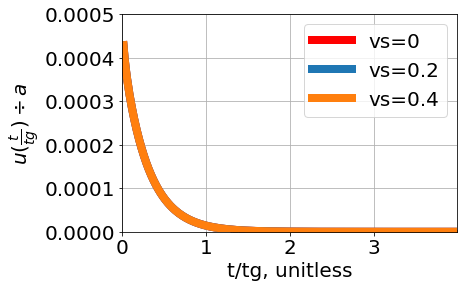

In [ ]:
#@markdown Test Model 3 - Numerical Inversion - with varying parameters

importlib.reload(plotting)
importlib.reload(viscoporoelastic_model)

#anal_offset = 1/7000.0 #0.0001
anal_offset = 1


tm = viscoporoelastic_model.TestModel3()
# inputting a value of time=0 doesn't error (just returns None/NaN), but takes longer (about 2x as much) on python; not really MATLAB though
#times=np.arange(0.1,100,0.1)/100.0
#times = np.arange(0.05, 5.05, 0.05)
#times=np.arange(0.001,2,0.01)
times=np.arange(100,7000*4,100)
tg = tm.tg
func = tm.laplace_value 
#func = lambda s: tm.laplace_value(s)*s
input_times = times
plot_times  = times/tg 
#func_name = {"t":r"$u(t/tg)\div a$", "s":r"$\overline{U}(s)$","t_anal":f"u(t/tg), {tm.inverted_value_units()}"}
func_name = {"t":r"$u(\frac{t}{tg})\div a$", "s":r"$\overline{U}(s)$","t_anal":f"u(t/tg), {tm.inverted_value_units()}"}
#func_name = {"t":r"$\frac{u(\frac{t}{tg})}{a}$", "s":r"$\overline{U}(s)$","t_anal":f"u(t/tg), {tm.inverted_value_units()}"}
x_names   = {"t":"t/tg, unitless", "s":"s, unitless","t_anal":"t/tg, unitless"}
s_vals = np.arange(0.01, 3.0, 0.01)


dfs = []


plt.figure(figsize=(6, 4))
plt.rc('font', size=20)  # default font size is 10
plt.grid()

for ind, vs in enumerate([0, 0.2, 0.4]):
  type(tm).vs = vs
  inverted_vals_numerical = euler_inversion(func, input_times/tg, Marg=None)
  laplace_vals = func(s_vals)
  #p=plt.plot(plot_times,inverted_vals_numerical, "rmg"[ind]+_".-", linewidth=8,label=f"vs={vs}")
  p=plt.plot(plot_times,inverted_vals_numerical, ["r","",""][ind]+".-", linewidth=8,label=f"vs={vs}")
  vars = tm.get_var_dict()
  #vars={key:getattr(tm,key) for key in dir(tm) if not key.startswith("__") and not callable(getattr(tm,key))}
  #display(pd.DataFrame(vars,index=["value"]))
  #display(pd.DataFrame(vars,index=[str(p[0].get_color())]))
  dfs.append(pd.DataFrame(vars,index=[f"Line #{ind+1} (vs={vs})"]))
  #display(dfs[-1])

plt.xlim([0, max(plot_times)])
plt.ylim([0, None])
plt.xlabel(x_names["t"])
#plt.xlim([0, None])
plt.ylabel(func_name["t"])
#plt.xlabel("t/tg, unitless")
plt.legend();
plt.yticks(np.linspace(0,0.0005,5+1))
ax = plt.gca()
ax.yaxis.get_ticklocs(minor=True)


display(pd.concat(dfs))



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

s=0.001, vs=0.00, s*func(s)=0.000000
s=0.001, vs=0.20, s*func(s)=0.000333
s=0.001, vs=0.40, s*func(s)=0.000462


,vs,tg,Es,eps0,a,alpha
vs=0,0.0,7000.0,7000000.0,0.001,0.003,0.500000
vs=0.2,0.2,7000.0,7000000.0,0.001,0.003,0.250000
vs=0.4,0.4,7000.0,7000000.0,0.001,0.003,0.071429


,at vs=0,at vs=0.2,at vs=0.4
ε0/2,0.000500,0.000500,0.000500
u(t/tg=0.0010)/a,0.000482,0.000491,0.000497
s*U(s) at s=100.0,0.000448,0.000475,0.000493
u(t/tg=4.00)/a,0.000000,0.000333,0.000462
s*U(s) at s=0.001,0.000000,0.000333,0.000462
ε0*3vs/(1+4vs),0.000000,0.000333,0.000462


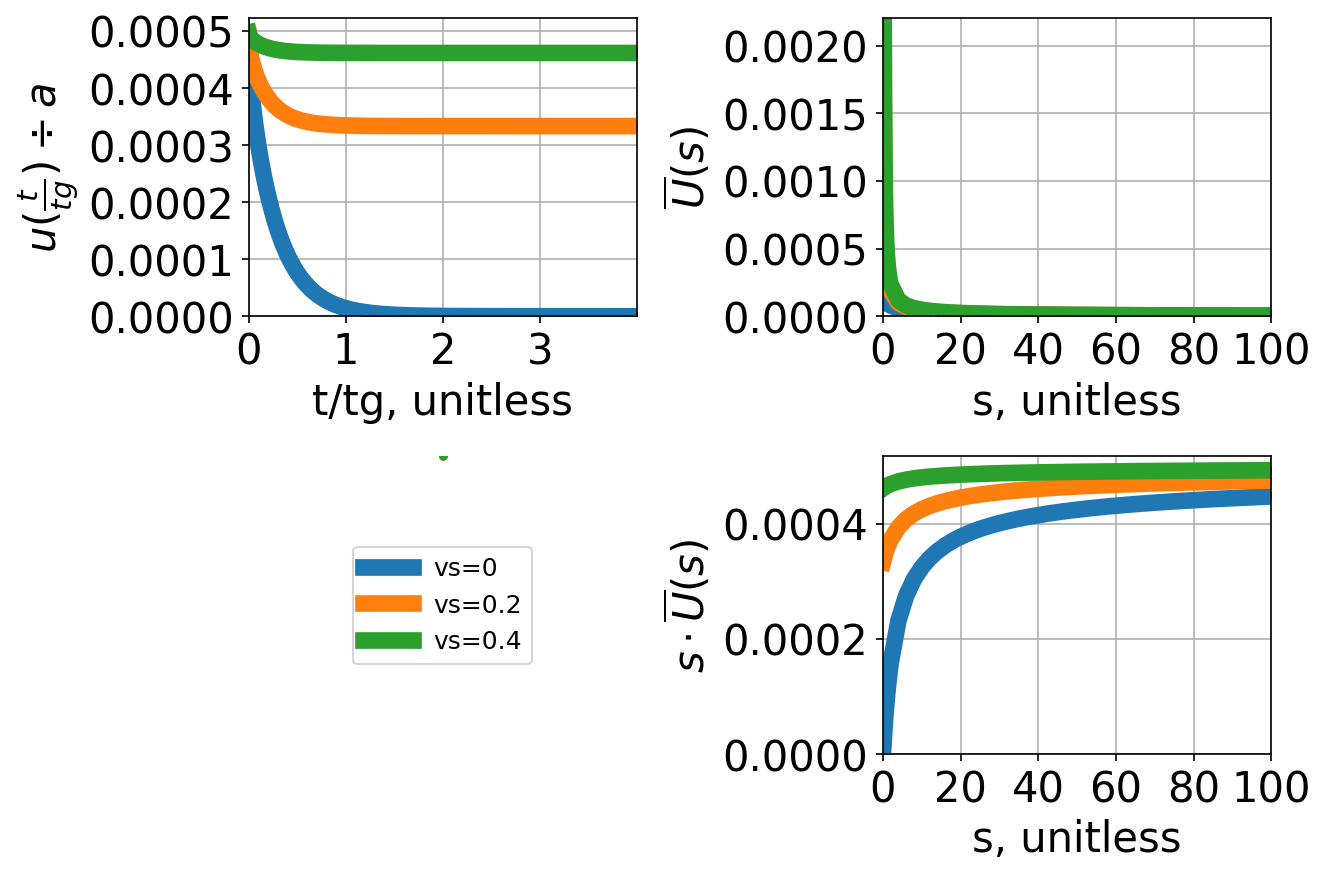

In [ ]:
#@markdown Test Model 3 - Numerical & Analytical Inversion - with varying parameters - Additional Plots

importlib.reload(plotting)
importlib.reload(viscoporoelastic_model)

#anal_offset = 1/7000.0 #0.0001
anal_offset = 1


tms = [] #
for vs in [0, 0.2, 0.4]:
  tms.append(viscoporoelastic_model.TestModel3())
  tms[-1].vs = vs
tm=tms[0]
# inputting a value of time=0 doesn't error (just returns None/NaN), but takes longer (about 2x as much) on python; not really MATLAB though
#times=np.arange(0.1,100,0.1)/100.0
#times = np.arange(0.05, 5.05, 0.05)
#times=np.arange(0.001,2,0.01)
#times=np.arange(70,7000*4,100)
#times=np.hstack([np.arange(70,7000*4,100),np.arange(7000*4,7000*40,7000*4)])
times=np.hstack([np.arange(0.7*10,70,0.7),np.arange(70,7000*4,100)])
tg = tm.tg
func = tm.laplace_value 
#func = lambda s: tm.laplace_value(s)*s
input_times = times
plot_times  = times/tg 
#func_name = {"t":r"$u(t/tg)\div a$", "s":r"$\overline{U}(s)$","t_anal":f"u(t/tg), {tm.inverted_value_units()}"}
func_name = {"t":r"$u(\frac{t}{tg})\div a$", "s":r"$\overline{U}(s)$","t_anal":f"u(t/tg), {tm.inverted_value_units()}"}
#func_name = {"t":r"$\frac{u(\frac{t}{tg})}{a}$", "s":r"$\overline{U}(s)$","t_anal":f"u(t/tg), {tm.inverted_value_units()}"}
x_names   = {"t":"t/tg, unitless", "s":"s, unitless","t_anal":"t/tg, unitless"}
#s_vals = np.arange(0.01, 10.0, 0.01)
s_vals = np.hstack([np.arange(0.01, 2, 0.01), np.arange(2, 102, 2)])




fig, axs = plt.subplots(2,2)
plt.rc('font', size=12)  # default font size is 10
fig.set_figwidth(9)
fig.set_figheight(6)
fig.set_dpi(150)

inverted_vals_numericals = []
ax = axs[0,0]
ax.grid()
for tm in tms:
  func = tm.laplace_value 
  inverted_vals_numerical = euler_inversion(func, input_times/tg, Marg=None)
  p=ax.plot(plot_times,inverted_vals_numerical, ".-", linewidth=8,label=f"vs={tm.vs}")
  inverted_vals_numericals.append(inverted_vals_numerical)
ax.set_yticks(np.linspace(0,0.0005,5+1))
ax.set_xlim([0, max(plot_times)])
ax.set_ylim([0, None])
ax.set_xlabel(x_names["t"])
ax.set_ylabel(func_name["t"])
#ax.legend();


ax = axs[0,1]
ax.grid()
for tm in tms:
  func = tm.laplace_value 
  laplace_vals = func(s_vals)
  p=ax.plot(s_vals,laplace_vals, ".-", linewidth=8,label=f"vs={tm.vs}")
ax.set_xlim([0, max(s_vals)])
#ax.set_ylim([0, None])
ax.set_ylim([0, max(laplace_vals[s_vals>0.2])])
ax.set_xlabel(x_names["s"])
ax.set_ylabel(func_name["s"])
#ax.legend();


ax = axs[1,0]
ax.axis('off')
for tm in tms:
  ax.plot(-1,1, ".-", linewidth=8,label=f"vs={tm.vs}")
ax.set_ylim([0, 1])
ax.legend(loc='center');


ax = axs[1,1]
ax.grid()
for tm in tms:
  func = tm.laplace_value 
  laplace_vals = func(s_vals)
  p=ax.plot(s_vals,s_vals*laplace_vals, ".-", linewidth=8,label=f"vs={tm.vs}")
ax.set_xlim([0, max(s_vals)])
ax.set_ylim([0, None])
ax.set_xlabel(x_names["s"])
ax.set_ylabel(r"$s\cdot$"+func_name["s"])
#ax.legend();


fig.tight_layout()


s_temp=0.001
for tm in tms:
  print(f"s={s_temp}, vs={tm.vs:0.2f}, s*func(s)={s_temp*tm.laplace_value(s=s_temp):0.6f}")



#varss=[{key:getattr(tm,key) for key in dir(tm) if not key.startswith("__") and not callable(getattr(tm,key))} for tm in tms]
varss=[tm.get_var_dict() for tm in tms]
#display(pd.DataFrame(vars,index=["value"]))
#display(pd.DataFrame(vars,index=[str(p[0].get_color())]))
display(pd.DataFrame(varss,index=[f"vs={tm.vs}" for tm in tms]))

varss=[
       {  
           f"ε0/2": tm.eps0/2,
           f"u(t/tg={times[0]/tg:0.4f})/a": inverted_vals_numericals[ind][0],
            f"s*U(s) at s={s_vals[-1]:0.1f}": np.round(s_vals[-1]*tm.laplace_value(s=s_vals[-1]), 6),
           f"u(t/tg={times[-1]/tg:0.2f})/a": np.round(inverted_vals_numericals[ind][-1], 6),
           f"s*U(s) at s={s_temp:0.3f}": np.round(s_temp*tm.laplace_value(s=s_temp), 6),
           f"ε0*3vs/(1+4vs)":       np.round(tm.eps0*3*tm.vs/(1+4*tm.vs), 6)
        } 
       for ind,tm in enumerate(tms)]
df = pd.DataFrame(varss,index=[f"at vs={tm.vs}" for tm in tms])
#df = df.style.set_properties( **{'width-min': '5000px'})
#df = df.apply(lambda x: '%.5f' % x)
display(df.transpose())

## Test Model 4 - Numerical Inversion

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1000
It took 0.0007 sec to evaluate the Laplace space func for 290 input s vals.
It took 0.1008 sec to numerically invert Laplace the func for 339 input times.


,v,strain_rate,t0/tg,tg,t0,eps0,C0
Line #1 (v=0),0.0,0.0003,0.1,1000,100.0,0.03,1.000000
Line #2 (v=0.2),0.2,0.0003,0.1,1000,100.0,0.03,0.750000
Line #3 (v=0.4),0.4,0.0003,0.1,1000,100.0,0.03,0.333333


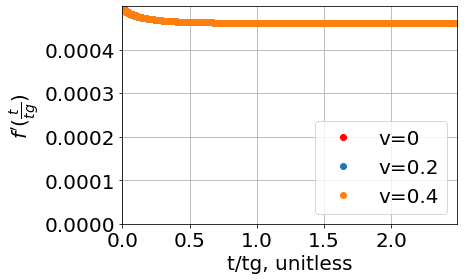

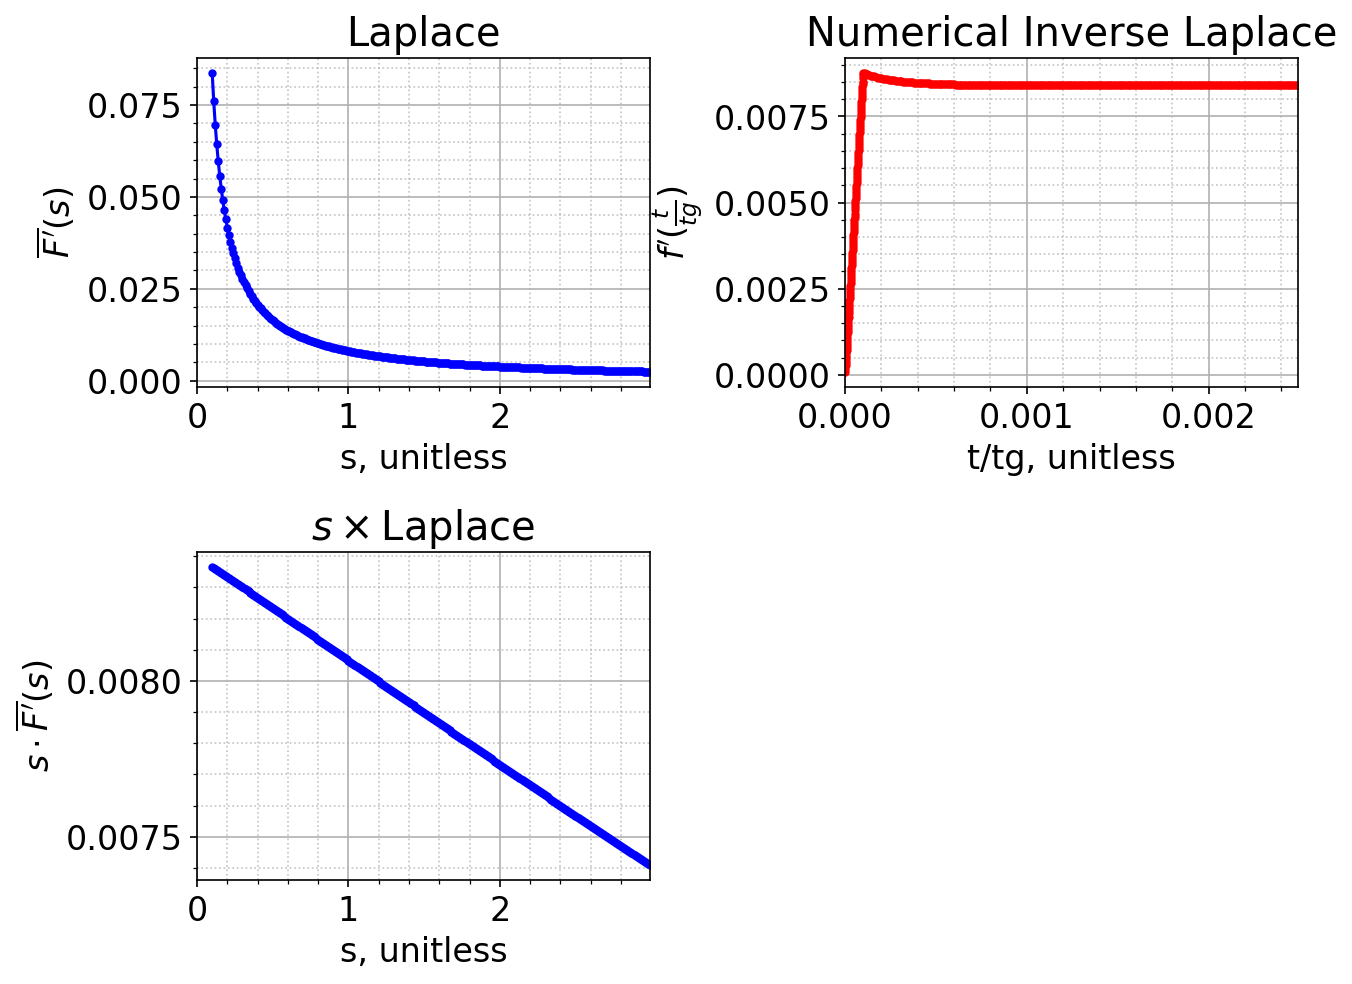

In [ ]:
#@markdown Test Model 4 - Numerical Inversion

importlib.reload(plotting)
importlib.reload(viscoporoelastic_model)

#anal_offset = 1/7000.0 #0.0001
anal_offset = 1


tm = viscoporoelastic_model.TestModel4()
tg = tm.tg
# inputting a value of time=0 doesn't error (just returns None/NaN), but takes longer (about 2x as much) on python; not really MATLAB though
#times=np.arange(0.1,100,0.1)/100.0
#times = np.arange(0.05, 5.05, 0.05)
#times=np.arange(0.001,2,0.01)
times=np.concatenate([np.arange(1,100,1),np.arange(100,1000*2.5,10)])
print(tg)
funcs = tm.laplace_value 
#func = lambda s: tm.laplace_value(s)*s
input_times = times
plot_times  = times/tg 
func_name = {"t":r"$f'(\frac{t}{tg})$", "s":r"$\overline{F'}(s)$","t_anal":f"f'(t/tg), {tm.inverted_value_units()}"}
x_names   = {"t":"t/tg, unitless", "s":"s, unitless","t_anal":"t/tg, unitless"}
input_s = np.arange(0.1, 3.0, 0.01)

dfs = []


#eps_0=0.03;   t_g=1000 s;   t_0=0.1 t_g;   eps_0_dot=0.0003 1/s; v=0; 0.2 ;and 0.4.


plt.figure(figsize=(6, 4))
plt.rc('font', size=20)  # default font size is 10
plt.grid()

for ind, v in enumerate([0, 0.2, 0.4]):
  tm.v = v
  inverted_vals_numerical = euler_inversion(func, input_times/tg, Marg=None)
  laplace_vals = func(s_vals)
  #p=plt.plot(plot_times,inverted_vals_numerical, "rmg"[ind]+".-", linewidth=8,label=f"vs={vs}")
  p=plt.plot(plot_times,inverted_vals_numerical, ["r","",""][ind]+"o", linewidth=8,label=f"v={v}")
  vars = tm.get_var_dict()
  #vars={key:getattr(tm,key) for key in dir(tm) if not key.startswith("__") and not callable(getattr(tm,key))}
  #dfs.append(pd.DataFrame(vars,index=["value"]))
  #dfs.append(pd.DataFrame(vars,index=[str(p[0].get_color())]))
  dfs.append(pd.DataFrame(vars,index=[f"Line #{ind+1} (v={v})"]))

plt.xlim([0, max(plot_times)])
plt.ylim([0, None])
plt.xlabel(x_names["t"])
#plt.xlim([0, None])
plt.ylabel(func_name["t"])
#plt.xlabel("t/tg, unitless")
plt.legend();
#plt.yticks(np.linspace(0,0.0005,5+1))
ax = plt.gca()
ax.yaxis.get_ticklocs(minor=True)
plt.legend(loc="lower right")


plt.rc('font', size=16)  # default font size is 10
fig, axs, laplace_vals, inverted_vals_numerical, inverted_vals_analytical=plotting.plot_laplace_analysis(
    funcs=funcs, func_name=func_name, x_names=x_names, input_s=input_s, 
    input_times=input_times, plot_times=plot_times, time_const=tg )


display(pd.concat(dfs))




## Test Model 5 (ArmstrongIsotropicModel) - Numerical Inversion

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

7000.0


/content/gdrive/MyDrive/Computer Backups/Rahul Yerrabelli drive/Academics/Work/SpectorMechanicsLab/SpectorResearch/Computations/SpectorLog/Yerrabelli-Spector-Porelastic-Model-Code/src/viscoporoelastic_model.py:585: RuntimeWarning: invalid value encountered in multiply
  f_prime = epszz * (3*I0(sqrt(s))-4*C0*I1(sqrt(s))/sqrt(s)) / (I0(sqrt(s))-C0*I1(sqrt(s))/sqrt(s))
/content/gdrive/MyDrive/Computer Backups/Rahul Yerrabelli drive/Academics/Work/SpectorMechanicsLab/SpectorResearch/Computations/SpectorLog/Yerrabelli-Spector-Porelastic-Model-Code/src/viscoporoelastic_model.py:585: RuntimeWarning: invalid value encountered in true_divide
  f_prime = epszz * (3*I0(sqrt(s))-4*C0*I1(sqrt(s))/sqrt(s)) / (I0(sqrt(s))-C0*I1(sqrt(s))/sqrt(s))
/content/gdrive/MyDrive/Computer Backups/Rahul Yerrabelli drive/Academics/Work/SpectorMechanicsLab/SpectorResearch/Computations/SpectorLog/Yerrabelli-Spector-Porelastic-Model-Code/src/viscoporoelastic_model.py:585: RuntimeWarning: invalid value encountered in

It took 0.0006 sec to evaluate the Laplace space func for 290 input s vals.
It took 0.0901 sec to numerically invert Laplace the func for 339 input times.


,v,strain_rate,t0/tg,tg,t0,eps0,C0
Line #1 (v=0),0.0,0.0001,0.014286,7000.0,100.0,0.01,1.000000
Line #2 (v=0.2),0.2,0.0001,0.014286,7000.0,100.0,0.01,0.750000
Line #3 (v=0.4),0.4,0.0001,0.014286,7000.0,100.0,0.01,0.333333


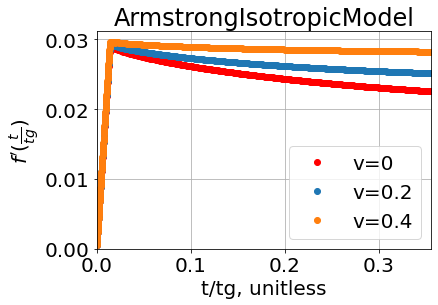

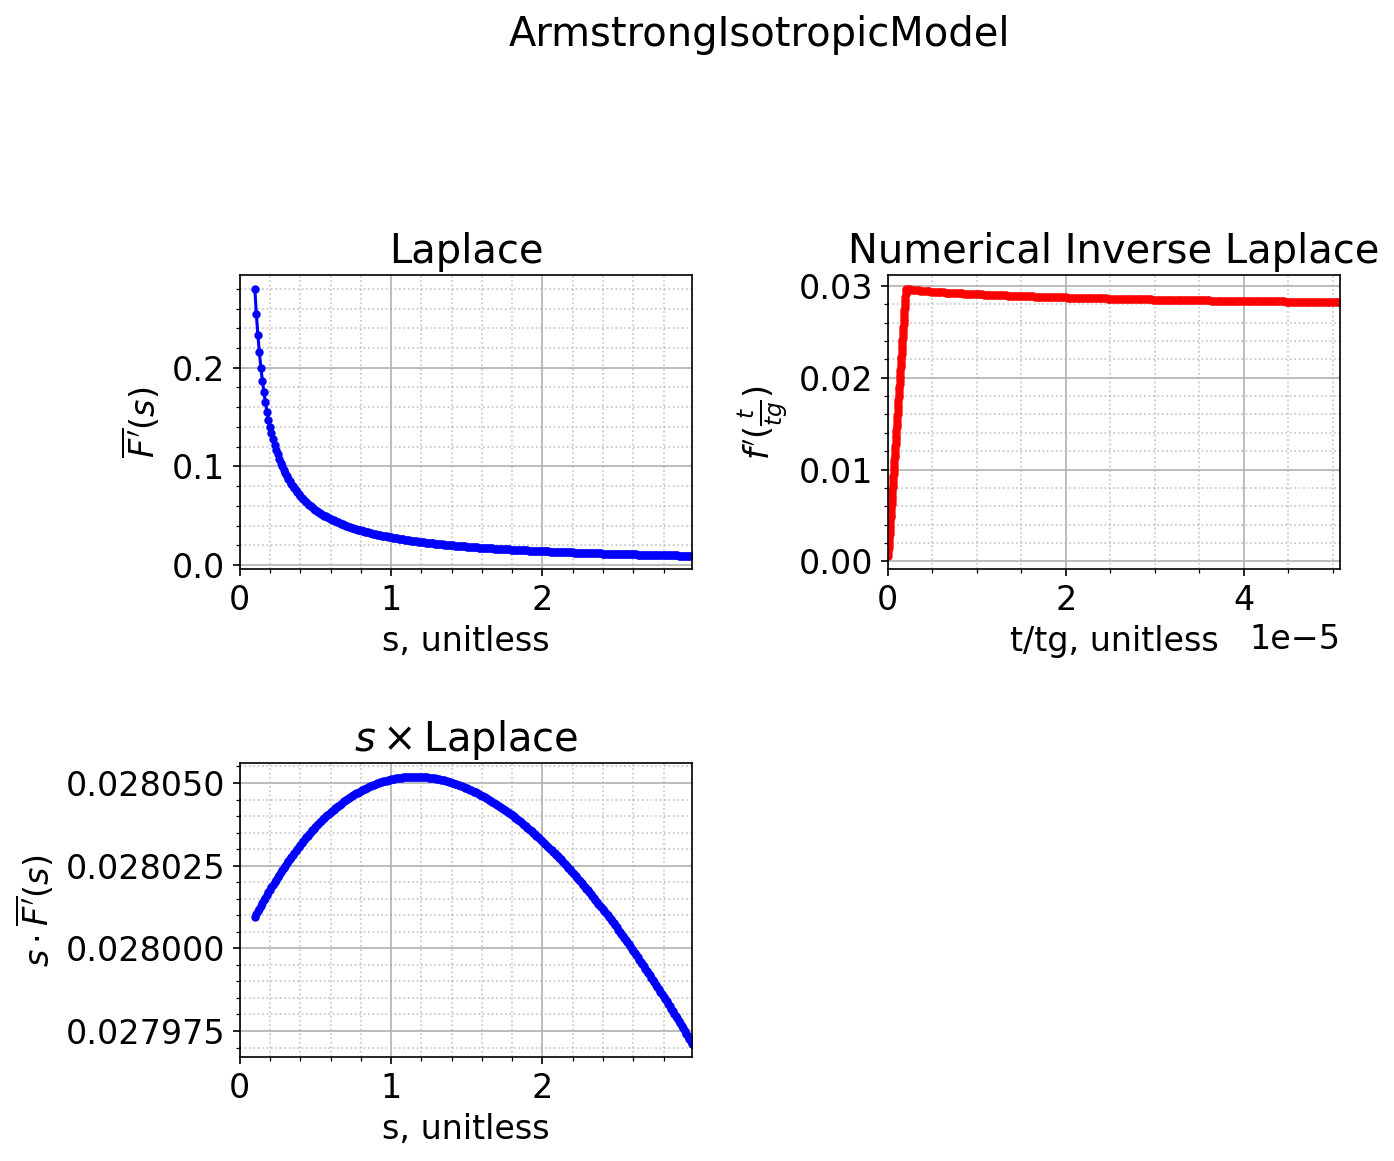

In [ ]:
#@markdown Test Model 5 (ArmstrongIsotropicModel) - Numerical Inversion

importlib.reload(plotting)
importlib.reload(viscoporoelastic_model)

#anal_offset = 1/7000.0 #0.0001
anal_offset = 1


tm = viscoporoelastic_model.ArmstrongIsotropicModel()
tg = tm.tg
# inputting a value of time=0 doesn't error (just returns None/NaN), but takes longer (about 2x as much) on python; not really MATLAB though
#times=np.arange(0.1,100,0.1)/100.0
#times = np.arange(0.05, 5.05, 0.05)
#times=np.arange(0.001,2,0.01)
times=np.concatenate([np.arange(1,100,1),np.arange(100,1000*2.5,10)])
print(tg)
func = tm.laplace_value 
#func = lambda s: tm.laplace_value(s)*s
input_times = times
plot_times  = times/tg
func_name = {"t":r"$f'(\frac{t}{tg})$", "s":r"$\overline{F'}(s)$","t_anal":f"f'(t/tg), {tm.inverted_value_units()}"}
x_names   = {"t":"t/tg, unitless", "s":"s, unitless","t_anal":"t/tg, unitless"}
input_s = np.arange(0.1, 3.0, 0.01)

dfs = []


#eps_0=0.03;   t_g=1000 s;   t_0=0.1 t_g;   eps_0_dot=0.0003 1/s; v=0; 0.2 ;and 0.4.


plt.figure(figsize=(6, 4))
plt.rc('font', size=20)  # default font size is 10
plt.grid()

for ind, v in enumerate([0, 0.2, 0.4]):
  tm.v = v
  inverted_vals_numerical = euler_inversion(func, input_times/tg, Marg=None)
  laplace_vals = func(input_s)
  #p=plt.plot(plot_times,inverted_vals_numerical, "rmg"[ind]+".-", linewidth=8,label=f"vs={vs}")
  p=plt.plot(plot_times,inverted_vals_numerical, ["r","",""][ind]+"o", linewidth=8,label=f"v={v}")
  vars = tm.get_var_dict()
  #vars={key:getattr(tm,key) for key in dir(tm) if not key.startswith("__") and not callable(getattr(tm,key))}
  #dfs.append(pd.DataFrame(vars,index=["value"]))
  #dfs.append(pd.DataFrame(vars,index=[str(p[0].get_color())]))
  dfs.append(pd.DataFrame(vars,index=[f"Line #{ind+1} (v={v})"]))

plt.xlim([0, max(plot_times)])
plt.ylim([0, None])
plt.xlabel(x_names["t"])
#plt.xlim([0, None])
plt.ylabel(func_name["t"])
#plt.xlabel("t/tg, unitless")
plt.legend();
#plt.yticks(np.linspace(0,0.0005,5+1))
ax = plt.gca()
ax.yaxis.get_ticklocs(minor=True)
plt.legend(loc="lower right")
plt.title(tm.get_model_name())


plt.rc('font', size=16)  # default font size is 10
fig, axs, laplace_vals, inverted_vals_numerical, inverted_vals_analytical=plotting.plot_laplace_analysis(
    funcs=func, func_name=func_name, x_names=x_names, input_s=input_s, 
    input_times=input_times, plot_times=plot_times, tg=tg, model_name = tm.get_model_name())


display(pd.concat(dfs))

In [ ]:
importlib.reload(plotting)
importlib.reload(viscoporoelastic_model)

tm = viscoporoelastic_model.ArmstrongIsotropicModel()
tg = tm.tg

#times=np.array([0.1, tm.t0_tg*0.99, tm.t0_tg*1.01, 10])*tg
times=np.array([0.001, tm.t0_tg, 1000])*tg
func = tm.laplace_value 
input_times = times
s_vals = np.array([0.0001, 1, 10000])

dfs = {"laplace_vals":[], "laplace_vals_times_s":[], "inverted_vals_numerical":[], "info":[]}


#eps_0=0.03;   t_g=1000 s;   t_0=0.1 t_g;   eps_0_dot=0.0003 1/s; v=0; 0.2 ;and 0.4.

inverted_vals_numerical_dfs = []
laplace_vals_dfs = []
laplace_vals_times_s_dfs = []
for ind, v in enumerate([0, 0.2, 0.4]):
  tm.v = v
  laplace_vals = func(s_vals)
  laplace_vals_times_s = func(s_vals) * s_vals
  inverted_vals_numerical = inverting.euler_inversion(func, input_times/tg, Marg=None)
  vars = tm.get_var_dict()

  #index=[f"Line #{ind+1} (v={v})"])
  #inverted_vals_numerical_dfs.append(pd.DataFrame(inverted_vals_numerical,index=[f"t/tg={input_time/tg:0.3f}" for input_time in input_times]))
  dfs["laplace_vals"].append(pd.DataFrame(laplace_vals.reshape(1,laplace_vals.size),index=[f"For v={v:.2f}"]))
  dfs["laplace_vals_times_s"].append(pd.DataFrame(laplace_vals_times_s.reshape(1,laplace_vals_times_s.size),index=[f"For v={v:.2f}"]))
  dfs["inverted_vals_numerical"].append(pd.DataFrame(inverted_vals_numerical.reshape(1,inverted_vals_numerical.size),index=[f"For v={v:.2f}"]))
  dfs["info"].append(pd.DataFrame(vars,index=[f"Line #{ind+1} (v={v:.2f})"]))




combined_dfs = {}
for key,group_of_dfs in dfs.items():
  combined_dfs[key] = pd.concat(group_of_dfs)
#dfs["inverted_vals_numerical"] = pd.concat(df)
#dfs["laplace_vals"] = pd.concat(laplace_vals_dfs)
#laplace_vals_times_s_dfs = pd.concat(laplace_vals_times_s_dfs)

combined_dfs["laplace_vals"].columns = [f"s={s_val}" for s_val in s_vals]
combined_dfs["laplace_vals_times_s"].columns = [f"s={s_val}" for s_val in s_vals]
combined_dfs["inverted_vals_numerical"].columns = [f"t/tg={input_time/tg:4.3f}" for input_time in input_times]
names = {
    "laplace_vals": "F(s) =",
    "laplace_vals_times_s": "F(s) × s =",
    "inverted_vals_numerical": "f(t/tg) =",
    "info": "Parameters"
}


display(IPython.display.HTML(f"<h1>Model: {tm.get_model_name()}</h1>"))
for key,df in combined_dfs.items():
  print("---------------------------------------------------------------------")
  #print(names.get(key) or key)
  display(IPython.display.HTML(f"<h2>{names.get(key) or key}</h2>"))
  display(df)
  print()



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---------------------------------------------------------------------


,s=0.0001,s=1.0,s=10000.0
For v=0.00,200.002357,0.021781,2.092965e-08
For v=0.20,240.001029,0.024790,2.094737e-08
For v=0.40,280.000100,0.028051,2.097671e-08



---------------------------------------------------------------------


,s=0.0001,s=1.0,s=10000.0
For v=0.00,0.020,0.021781,0.000209
For v=0.20,0.024,0.024790,0.000209
For v=0.40,0.028,0.028051,0.000210



---------------------------------------------------------------------


,t/tg=0.001,t/tg=0.014,t/tg=1000.000
For v=0.00,0.002083,0.029005,0.019989
For v=0.20,0.002087,0.029252,0.023987
For v=0.40,0.002094,0.029644,0.027984



---------------------------------------------------------------------


,v,strain_rate,t0/tg,tg,t0,eps0,C0
Line #1 (v=0.00),0.0,0.0001,0.014286,7000.0,100.0,0.01,1.000000
Line #2 (v=0.20),0.2,0.0001,0.014286,7000.0,100.0,0.01,0.750000
Line #3 (v=0.40),0.4,0.0001,0.014286,7000.0,100.0,0.01,0.333333


# Inversion Methods Comparison with mpmath

## Simple Laplace transform tests

In [ ]:
# https://mpmath.org/doc/current/calculus/inverselaplace.html#manual-approach
import numpy as np
import mpmath as mp
import pandas as pd

times = np.array([0.001, 0.01, 0.1, 1, 10])
inversion_methods = ["deHoog", "talbot", "stehfest"]

#Fs = (lambda s: 1/(s+1)**2)
#ft = (lambda t: t*mp.exp(-t))
#times = mp.matrix(times)
Fs = np.frompyfunc( (lambda s: 1/(s+1)**2), 1, 1)
ft = np.frompyfunc( (lambda t: t*mp.exp(-t)), 1, 1)
analytic_vals = ft(times)

for ind in range(len(tt)):
    print( times[ind], ft(times[ind]), analytic_vals[ind]-mp.invertlaplace(Fs,times[ind],method='talbot') )

#mp_invertlaplace = np.frompyfunc(mp.invertlaplace,3,1)
mp_invertlaplace = np.vectorize(mp.invertlaplace, excluded=["method"])
pd.DataFrame({"t":times, "f(t)":analytic_vals, 
              **{method:analytic_vals-mp_invertlaplace(Fs,times,method=method) for method in inversion_methods}
              })

<IPython.core.display.Javascript object>

0.001 0.000999000499833375 8.57923043561212e-20
0.01 0.00990049833749168 3.27007646698047e-19
0.1 0.090483741803596 -1.75215800052168e-18
1.0 0.367879441171442 1.2428864009344e-17
10.0 0.000453999297624849 4.04513489306658e-20


,t,f(t),deHoog,talbot,stehfest
0,0.001,0.000999000499833375,8.48670764867155e-20,8.57923043561212e-20,8.56405066222791e-20
1,0.010,0.00990049833749168,3.23076894928511e-19,3.27007646698047e-19,3.12751859713438e-19
2,0.100,0.090483741803596,-1.77951034306288e-18,-1.75215800052168e-18,-1.74322358577507e-18
3,1.000,0.367879441171442,1.23493168544941e-17,1.2428864009344e-17,1.28192302157845e-17
4,10.000,0.000453999297624849,-1.00372093168364e-17,4.04513489306658e-20,7.05653468193284e-13


In [ ]:
# https://mpmath.org/doc/current/calculus/inverselaplace.html#manual-approach


#times = np.array([0.001, 0.01, 0.1, 1, 10])
times = np.linspace(0.01,10,100, endpoint=True)
Fs = np.frompyfunc( (lambda s: 1/(s+1)**2), 1, 1)
ft = np.frompyfunc( (lambda t: t*mp.exp(-t)), 1, 1)
analytic_vals = ft(times)

inversion_methods = ["deHoog", "talbot", "stehfest"]
mp_invertlaplace = np.vectorize(mp.invertlaplace, excluded=["method"])

df=pd.DataFrame({"t":times, "f(t)":analytic_vals, 
              **{method:mp_invertlaplace(Fs,times,method=method) for method in inversion_methods}
              })
for method in inversion_methods:
    df[f"{method}Error"] = df[method]/df["f(t)"] - 1 # (df[method] - df["f(t)"])/df["f(t)"]
#display(df)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

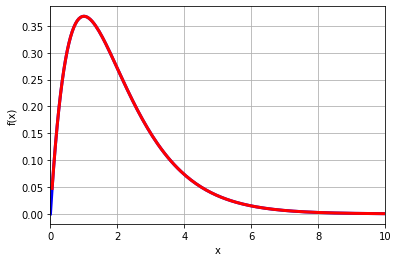

In [ ]:
method = "deHoog"
mp.plot( [ ft, (lambda t: mp.invertlaplace(Fs,t,method=method))],[0,np.max(df["t"])])

<IPython.core.display.Javascript object>

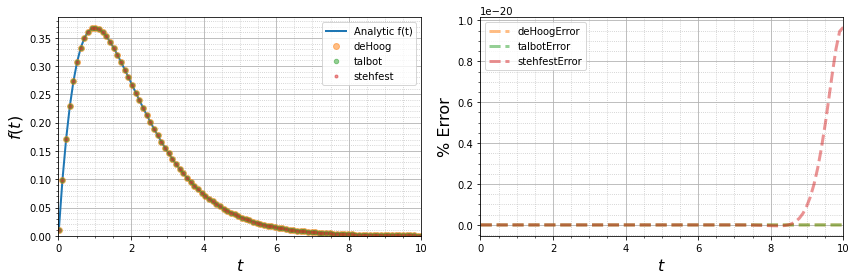

In [ ]:
ncols = 2 if "f(t)" in df.columns else 1
nrows = 1

fig, axes = plt.subplots(nrows=nrows,ncols=ncols, figsize=(6*ncols,4*nrows))
if "f(t)" in df.columns:
    axes.flat[0].plot(df["t"],df["f(t)"], lw=2, label="Analytic f(t)")
for ind,method in enumerate(inversion_methods):
    axes.flat[0].plot(df["t"],df[method],".",alpha=0.5, markersize=12-ind*3, label=method)
axes.flat[0].set_ylabel(f"$f(t)$",fontsize=16)
axes.flat[0].set_ylim([0,None])

if ncols>1 and "f(t)" in df.columns:
    next(axes.flat[1]._get_lines.prop_cycler)  # skip first color to line up
    for method in inversion_methods:
        axes.flat[1].plot(df["t"],df[f"{method}Error"]*100,"--",alpha=0.5, lw=3, label=f"{method}Error")
    axes.flat[1].set_ylabel(f"% Error",fontsize=16)

for ax in fig.axes:
    ax.grid(which="major")  # set major grid lines
    ax.grid(which="minor", alpha=0.75, linestyle=":")  # set minor grid lines, but make them less visible
    ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
    ax.set_xlim([0,np.max(df["t"])])
    ax.set_xlabel(f"$t$",fontsize=16)
    ax.legend()
fig.tight_layout()



## Now with Cohen viscoporoelastic models

### Proof of concept with Cohen tg=0 and with only a few time points

In [ ]:
importlib.reload(plotting)
importlib.reload(viscoporoelastic_model)
from viscoporoelastic_model import CohenModel, CohenModel1998, getCohenModelModified

vpe = (viscoporoelastic_model.getCohenModelModified(tg=1), fr"$Cohen$") 
vpe[0].set_equation_library("mpmath")
tg = vpe[0].tg
times = np.linspace(0.01,1.25,6, endpoint=True)*tg
Fs = np.frompyfunc( vpe[0].laplace_value, 1, 1)
ft = np.frompyfunc( vpe[0].inverted_value, 1, 1)
analytic_vals = ft(times)

inversion_methods = ["deHoog", "talbot", "stehfest"]
mp_invertlaplace = np.vectorize(mp.invertlaplace, excluded=["method"])

df=pd.DataFrame({"t":times, 
                 "f(t)":analytic_vals, 
              **{method:mp_invertlaplace(Fs,times/tg,method=method) for method in inversion_methods}
              })
if "f(t)" in df.columns:
    for method in inversion_methods:
        df[f"{method}Error"] = df[method]/df["f(t)"] - 1 # equivalent to  (df[method] - df["f(t)"])/df["f(t)"]
df

<IPython.core.display.Javascript object>

,t,f(t),deHoog,talbot,stehfest,deHoogError,talbotError,stehfestError
0,0.010,0.003544075127318366,0.00240243887254394861174149038,2.54923052944229932889653711e+16006,0.00240243887254394861174149038,-0.322125297506952021700847381,7.19293592224491400755807636e+16008,-0.322125297506952021700847381
1,0.258,0.06485275991208013,0.0522996594912064950642199033,0.0522996594907868262398856069,0.0524583682445027838813944451,-0.193563087182283006269751453,-0.193563087188754108269161114,-0.191115870540902627282362662
2,0.506,0.051401653130327594,0.0481889234218621425790359894,0.0481889234218621425790361219,0.0481886064594290321062944126,-0.0625024588279224559078336057,-0.0625024588279224559078310277,-0.0625086252139004870518990873
3,0.754,0.04799912246536161,0.0471490903615018321613954384,0.0471490903615018321613954385,0.047149064143430029756458186,-0.0177093259251395479811115767,-0.0177093259251395479811115745,-0.0177098721449547399174434566
4,1.002,0.04709889388698493,0.0468739752986706249854262761,0.0468739752986706249854262762,0.0468739741878688741948174115,-0.00477545372623836923988105752,-0.00477545372623836923988105691,-0.00477547731069352557556169121
5,1.250,0.04686069331844428,0.0468011798265487964501320026,0.0468011798265487964501320026,0.0468011797095147962746479511,-0.00127000877880863357354947098,-0.00127000877880863357354947088,-0.00127001127629622685718728603


<IPython.core.display.Javascript object>

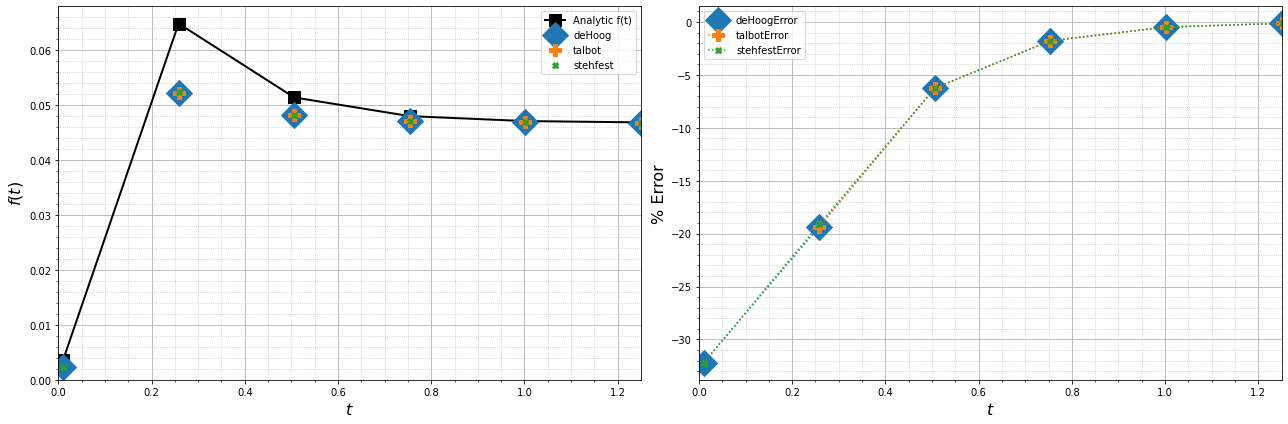

In [ ]:
ncols = 2 if "f(t)" in df.columns else 2
nrows = 1

fig, axes = plt.subplots(nrows=nrows,ncols=ncols, figsize=(9*ncols,6*nrows))
if "f(t)" in df.columns:
    axes.flat[0].plot(df["t"]/tg,df["f(t)"], "ks-", lw=2, ms=12, label="Analytic f(t)")
for ind,method in enumerate(inversion_methods):
    axes.flat[0].plot(df["t"]/tg,df[method],
                      #marker=[4,5,6][ind], markersize=12, alpha=0.8,  # caret triangles
                      "DPX"[ind], markersize=18-ind*6,
                      #"123"[ind], markersize=18,
                      #"s8X"[ind], markersize=12-ind*3,
                      #"o",alpha=0.85, markersize=12-ind*4, 
                      label=method)  #, markeredgecolor=(0,0,0,1), , markeredgewidth=6
axes.flat[0].set_ylabel(f"$f(t)$",fontsize=16)
axes.flat[0].set_ylim([0,None])

if ncols>1 and "f(t)" in df.columns:
    #next(axes.flat[1]._get_lines.prop_cycler)  # skip first color to line up
    for ind,method in enumerate(inversion_methods):
        axes.flat[1].plot(df["t"]/tg,df[f"{method}Error"]*100,
                          "DPX"[ind]+":", markersize=18-ind*6,
                          #"o--",alpha=0.85, markersize=12-ind*4, 
                          label=f"{method}Error")
    axes.flat[1].set_ylabel(f"% Error",fontsize=16)

for ax in fig.axes:
    ax.grid(which="major")  # set major grid lines
    ax.grid(which="minor", alpha=0.75, linestyle=":")  # set minor grid lines, but make them less visible
    ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
    ax.set_xlim([0,np.max(df["t"]/tg)])
    ax.set_xlabel(f"$t/t_g$",fontsize=16)
    ax.legend()
fig.tight_layout()



### Cohen Model with our original parameters and numerous time points

In [ ]:
importlib.reload(plotting)
importlib.reload(viscoporoelastic_model)
from viscoporoelastic_model import CohenModel, CohenModel1998, getCohenModelModified

vpe = (viscoporoelastic_model.getCohenModelModified(), fr"$Cohen$") 
vpe[0].set_equation_library("mpmath")
tg = vpe[0].tg
times = np.concatenate( [np.linspace(0.001,0.25,11, endpoint=True),np.arange(0.3, 1.51, 0.05) ])*tg
Fs = np.frompyfunc( vpe[0].laplace_value, 1, 1)
ft = np.frompyfunc( vpe[0].inverted_value, 1, 1)
analytic_vals = ft(times)

inversion_methods = ["deHoog"]   #, "talbot", "stehfest"]
mp_invertlaplace = np.vectorize(mp.invertlaplace, excluded=["method"])

df=pd.DataFrame({"t":times, 
                 "f(t)":analytic_vals, 
              **{method:mp_invertlaplace(Fs,times/tg,method=method) for method in inversion_methods}
              })
if "f(t)" in df.columns:
    for method in inversion_methods:
        df[f"{method}Error"] = df[method]/df["f(t)"] - 1 # equivalent to  (df[method] - df["f(t)"])/df["f(t)"]
df

<IPython.core.display.Javascript object>

,t,f(t),deHoog,deHoogError
0,0.040620,0.015087570438891295,0.00997003005232309139613385954,-0.339189162847365906579292793
1,1.052058,0.35739222475461124,0.248024299572385696742957819,-0.306016520805170173712968081
2,2.063496,0.6700143483687603,0.477007401508716954404108085,-0.288063900914875336646506226
3,3.074934,0.9640978198187855,0.700324984067585414602408815,-0.273595511087017667750301993
4,4.086372,1.2439513883200295,0.919293825942287547468395607,-0.260988946534474855327093782
5,5.097810,1.512163271281537,1.13470490135005376394736386,-0.249614824734892915584138514
6,6.109248,1.7705525589252007,1.34711413478907570415898866,-0.239156088307917719399314119
7,7.120686,2.0205161568813863,1.55694842870335306115536524,-0.229430349566487938391756384
8,8.132124,2.2631866724244736,1.76455391442989584945725417,-0.22032330079975670189568284
9,9.143562,2.4995131087428804,1.97022061264274016414075307,-0.211758239734275941243569442


In [ ]:
np.full_like(df["t"],0)

<IPython.core.display.Javascript object>

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

<IPython.core.display.Javascript object>

/content/gdrive/MyDrive/Computer Backups/Rahul Yerrabelli drive/Academics/Work/SpectorMechanicsLab/SpectorResearch/Computations/SpectorLog/Yerrabelli-Spector-Porelastic-Model-Code/src/inverting.py:154: RuntimeWarning: divide by zero encountered in true_divide
  F_s_val, is_inf = F_s(beta_mesh / t_mesh, return_error_inds=True)
/content/gdrive/MyDrive/Computer Backups/Rahul Yerrabelli drive/Academics/Work/SpectorMechanicsLab/SpectorResearch/Computations/SpectorLog/Yerrabelli-Spector-Porelastic-Model-Code/src/inverting.py:154: RuntimeWarning: invalid value encountered in true_divide
  F_s_val, is_inf = F_s(beta_mesh / t_mesh, return_error_inds=True)
/content/gdrive/MyDrive/Computer Backups/Rahul Yerrabelli drive/Academics/Work/SpectorMechanicsLab/SpectorResearch/Computations/SpectorLog/Yerrabelli-Spector-Porelastic-Model-Code/src/inverting.py:163: RuntimeWarning: divide by zero encountered in true_divide
  ilt = 10 ** (Marg/3) / times * sum (eta_mesh * real(F_s(beta_mesh / t_mesh)), axis=

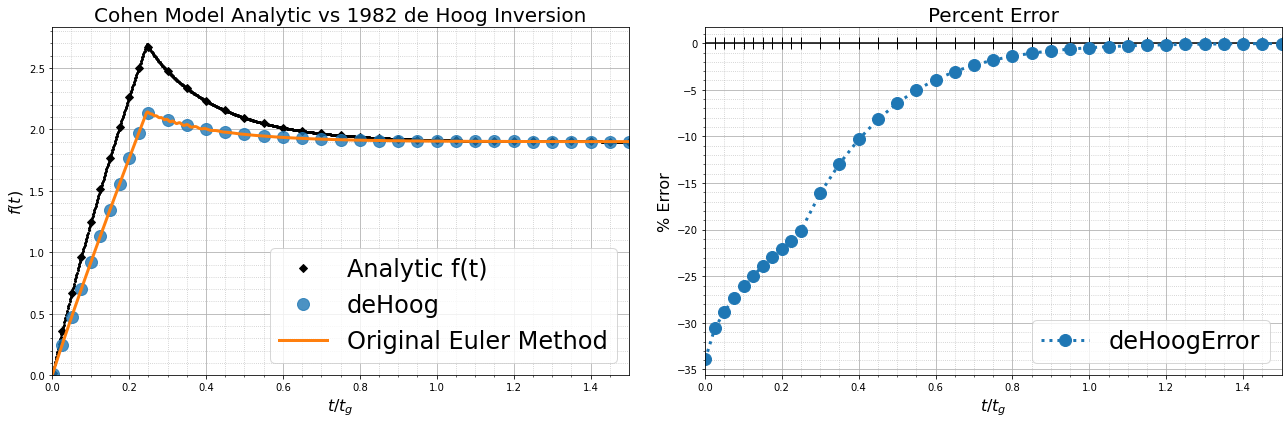

In [ ]:
ncols = 2 if "f(t)" in df.columns else 2
nrows = 1

fig, axes = plt.subplots(nrows=nrows,ncols=ncols, figsize=(9*ncols,6*nrows))
if "f(t)" in df.columns:
    continuous_t = np.linspace(0,np.max(df["t"]),1000,endpoint=True)
    axes.flat[0].plot(continuous_t/tg,ft(continuous_t), "k.", ms=4)
    axes.flat[0].plot(df["t"]/tg,df["f(t)"], "kD", lw=2, ms=6, label="Analytic f(t)")


for ind,method in enumerate(inversion_methods):
    axes.flat[0].plot(df["t"]/tg,df[method],
                      "o", ms=12, alpha=0.8,
                      #marker=[4,5,6][ind], markersize=12, alpha=0.8,  # caret triangles
                      #"DPX"[ind], markersize=18-ind*6,
                      #"123"[ind], markersize=18,
                      #"s8X"[ind], markersize=12-ind*3,
                      #"o",alpha=0.85, markersize=12-ind*4, 
                      label=method)  #, markeredgecolor=(0,0,0,1), , markeredgewidth=6
axes.flat[0].set_ylabel(f"$f(t)$",fontsize=16)
axes.flat[0].set_ylim([0,None])

euler_inverted = inverting.euler_inversion( viscoporoelastic_model.getCohenModelModified().laplace_value, continuous_t/tg)
axes.flat[0].plot(continuous_t/tg, euler_inverted, "-", lw=3, label="Original Euler Method" )


if ncols>1 and "f(t)" in df.columns:
    #next(axes.flat[1]._get_lines.prop_cycler)  # skip first color to line up
    axes.flat[1].plot(df["t"]/tg, np.full_like(df["t"],0), "k|-", ms=12)
    for ind,method in enumerate(inversion_methods):
        axes.flat[1].plot(df["t"]/tg,df[f"{method}Error"]*100,
                          "o:", ms=12, lw=3,
                          #"DPX"[ind]+":", markersize=18-ind*6,
                          #"o--",alpha=0.85, markersize=12-ind*4, 
                          label=f"{method}Error")
    axes.flat[1].set_ylabel(f"% Error",fontsize=16)

axes.flat[0].set_title("Cohen Model Analytic vs 1982 de Hoog Inversion",fontsize=20)
axes.flat[1].set_title("Percent Error",fontsize=20)



for ax in fig.axes:
    ax.grid(which="major")  # set major grid lines
    ax.grid(which="minor", alpha=0.75, linestyle=":")  # set minor grid lines, but make them less visible
    ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
    ax.set_xlim([0,np.max(df["t"])/tg])
    ax.set_xlabel(f"$t/t_g$",fontsize=16)
    ax.legend(loc="lower right", fontsize=24)
fig.tight_layout()

plt.savefig(get_path_to_save(file_prefix="", save_filename="Cohen Model Inversion via de Hoog technique"), bbox_inches='tight')  # Include the bbox_inches='tight' is critical to ensure the saved images aren't cutoff while the colab images are normal

### Cohen model with other parameters

In [ ]:
importlib.reload(plotting)
importlib.reload(viscoporoelastic_model)
from viscoporoelastic_model import CohenModel, CohenModel1998, getCohenModelModified

vpe = (viscoporoelastic_model.getCohenModelModified(v31=0.707106), fr"$Cohen$") 
vpe[0].set_equation_library("mpmath")
tg = vpe[0].tg
times = np.concatenate([
                        [0.2, 0.3],
                        np.linspace(0.01,1.25,6, endpoint=True)])*tg
times.sort()
Fs = np.frompyfunc( vpe[0].laplace_value, 1, 1)
ft = np.frompyfunc( vpe[0].inverted_value, 1, 1)
analytic_vals = ft(times)

#inversion_methods = ["deHoog", "talbot", "stehfest"]
inversion_methods = ["deHoog", "stehfest"]
mp_invertlaplace = np.vectorize(mp.invertlaplace, excluded=["method"])

df=pd.DataFrame({"t":times, 
                 "f(t)":analytic_vals, 
              **{method:mp_invertlaplace(Fs,times/tg,method=method) for method in inversion_methods}
              })
if "f(t)" in df.columns:
    for method in inversion_methods:
        df[f"{method}Error"] = df[method]/df["f(t)"] - 1 # equivalent to  (df[method] - df["f(t)"])/df["f(t)"]
df

<IPython.core.display.Javascript object>

,t,f(t),deHoog,stehfest,deHoogError,stehfestError
0,0.40620,0.07717783788880865,0.0645899389359017,0.0645899389359017,-0.163102508404583,-0.163102508404583
1,8.12400,1.5435584363283195,1.42213967485503,1.41828227011298,-0.0786615903976454,-0.0811606242218723
2,10.47996,1.8999984480268044,1.77948752006104,1.78006282409141,-0.0634268560013386,-0.0631240641590799
3,12.18600,1.8999988433083255,1.81018198472655,1.8086285988923,-0.0472720596110379,-0.048089631600476
4,20.55372,1.8999996867822402,1.87567839545775,1.87586081142886,-0.0128006817546772,-0.0127046733330031
5,30.62748,1.899999933855368,1.89486381745998,1.89488066062639,-0.00270321924957351,-0.00269435442483956
6,40.70124,1.8999999860304577,1.8989152540848,1.89891027946717,-0.000570911554543363,-0.000573529774366199
7,50.77500,1.8999999970496753,1.89977090496217,1.89977188906334,-0.000120574783084471,-0.0001200568351023


<IPython.core.display.Javascript object>

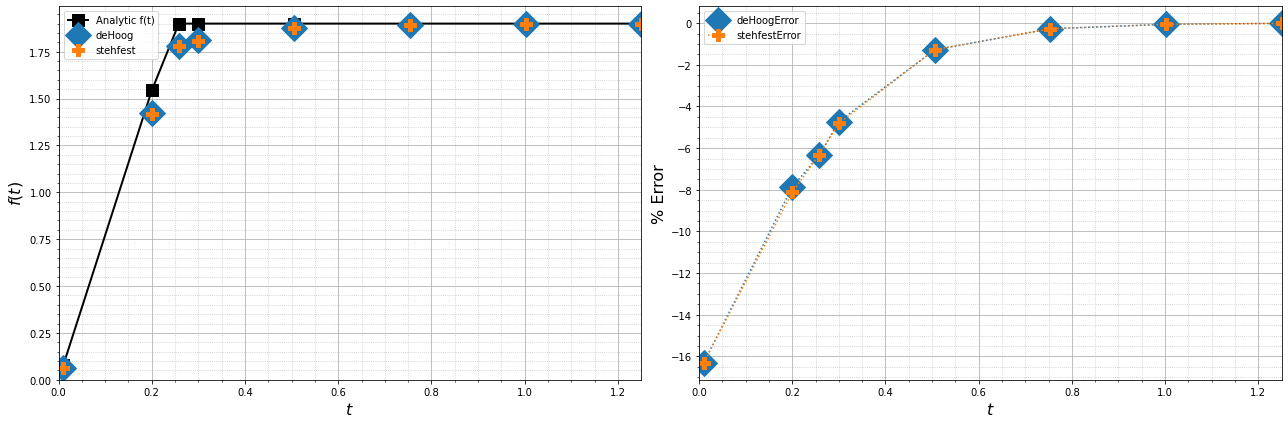

In [ ]:
ncols = 2 if "f(t)" in df.columns else 2
nrows = 1

fig, axes = plt.subplots(nrows=nrows,ncols=ncols, figsize=(9*ncols,6*nrows))
if "f(t)" in df.columns:
    axes.flat[0].plot(df["t"]/tg,df["f(t)"], "ks-", lw=2, ms=12, label="Analytic f(t)")
for ind,method in enumerate(inversion_methods):
    axes.flat[0].plot(df["t"]/tg,df[method],
                      #marker=[4,5,6][ind], markersize=12, alpha=0.8,  # caret triangles
                      "DPX"[ind], markersize=18-ind*6,
                      #"123"[ind], markersize=18,
                      #"s8X"[ind], markersize=12-ind*3,
                      #"o",alpha=0.85, markersize=12-ind*4, 
                      label=method)  #, markeredgecolor=(0,0,0,1), , markeredgewidth=6
axes.flat[0].set_ylabel(f"$f(t)$",fontsize=16)
axes.flat[0].set_ylim([0,None])

if ncols>1 and "f(t)" in df.columns:
    #next(axes.flat[1]._get_lines.prop_cycler)  # skip first color to line up
    for ind,method in enumerate(inversion_methods):
        axes.flat[1].plot(df["t"]/tg,df[f"{method}Error"]*100,
                          "DPX"[ind]+":", markersize=18-ind*6,
                          #"o--",alpha=0.85, markersize=12-ind*4, 
                          label=f"{method}Error")
    axes.flat[1].set_ylabel(f"% Error",fontsize=16)

for ax in fig.axes:
    ax.grid(which="major")  # set major grid lines
    ax.grid(which="minor", alpha=0.75, linestyle=":")  # set minor grid lines, but make them less visible
    ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
    ax.set_xlim([0,np.max(df["t"]/tg)])
    ax.set_xlabel(f"$t$",fontsize=16)
    ax.legend()
fig.tight_layout()



# Error Diagnosis

## Laplace function relevant properties - for diagnosing errors
### Sources:
*   https://lpsa.swarthmore.edu/LaplaceXform/FwdLaplace/LaplaceProps.html
*   https://lpsa.swarthmore.edu/LaplaceZTable/Common%20Laplace%20Transform%20Pairs.pdf

### Properties:  
1. Initial Value Theorem   
image.png

1. Final Value Theorem   
image.png

1. Time scaling.  
![image.png](https://lpsa.swarthmore.edu/LaplaceXform/FwdLaplace/Funcs/imgB1.gif)

1. Multiplication by time.  
![image.png](https://lpsa.swarthmore.edu/LaplaceXform/FwdLaplace/Funcs/imgAF.gif)

## Diagnose Potential Errors in Numerical Inversion

In [ ]:
print(viscoporoelastic_model.TestModel2().tg)
print(f"{np.round(1/0.0001)}-{np.round(1/0.00001)}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

7000.0
10000.0-100000.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

bessel_len=10000
	 Sum/a=4.1417 	 at t=  0.0,	 tg=7000.0,	 t/tg=0.0000
	 Sum/a=2.1058 	 at t= 70.0,	 tg=7000.0,	 t/tg=0.0100
	 Sum/a=1.7231 	 at t=210.0,	 tg=7000.0,	 t/tg=0.0300
	 Sum/a=1.2528 	 at t=700.0,	 tg=7000.0,	 t/tg=0.1000
	 Sum/a=0.7452 	 at t=2100.0,	 tg=7000.0,	 t/tg=0.3000


,N,α^2,diff,N*pi-α^2,exp(-α^2*0.00)/(α^2-1),exp(-α^2*0.01)/(α^2-1),exp(-α^2*0.03)/(α^2-1),exp(-α^2*0.10)/(α^2-1),exp(-α^2*0.30)/(α^2-1),Sum so far at t/tg=0.00,Sum so far at t/tg=0.01,Sum so far at t/tg=0.03,Sum so far at t/tg=0.10,Sum so far at t/tg=0.30
0,1,1.841184,None,1.300409,1.188801,1.167113e+00,1.124917,0.988889,0.684265,1.188801,1.167113,1.124917,0.988889,0.684265
1,2,5.331443,3.49026,0.951743,0.230870,2.188836e-01,0.196746,0.135465,0.046638,1.419671,1.385997,1.321663,1.124354,0.730903
2,3,8.536316,3.20487,0.888462,0.132691,1.218339e-01,0.102712,0.056508,0.010248,1.552362,1.507831,1.424375,1.180862,0.741152
3,4,11.706005,3.16969,0.860366,0.093406,8.308718e-02,0.065744,0.028973,0.002788,1.645767,1.590918,1.490119,1.209835,0.743939
4,5,14.863589,3.15758,0.844375,0.072131,6.216882e-02,0.046182,0.016316,0.000835,1.717899,1.653087,1.536301,1.226150,0.744774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,31402.574739,3.14159,0.785426,0.000032,1.328615e-141,0.000000,0.000000,0.000000,4.141602,2.105837,1.723079,1.252821,0.745169
9996,9997,31405.716332,3.14159,0.785426,0.000032,1.287396e-141,0.000000,0.000000,0.000000,4.141634,2.105837,1.723079,1.252821,0.745169
9997,9998,31408.857925,3.14159,0.785426,0.000032,1.247455e-141,0.000000,0.000000,0.000000,4.141666,2.105837,1.723079,1.252821,0.745169
9998,9999,31411.999517,3.14159,0.785426,0.000032,1.208753e-141,0.000000,0.000000,0.000000,4.141697,2.105837,1.723079,1.252821,0.745169


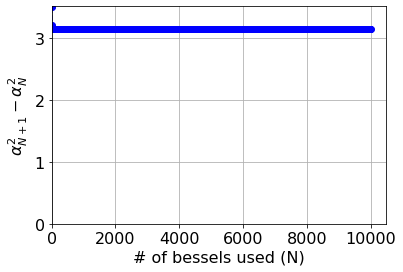

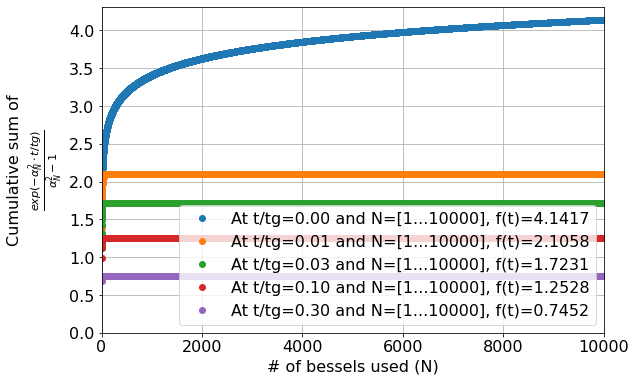

In [ ]:
#import scipy.special as sp
import scipy.special
import scipy as sp
import pandas as pd

self = viscoporoelastic_model.TestModel3()
vs, tg, Es, eps0, a = self.get_fittable_parameters()
bessel_len=10000 #100000
off=0
times=np.array([0.00,0.01,0.03,0.1,0.3])*tg


def I0(x): return scipy.special.iv(0, x) #return np.i0(x); #besseli(0, x)
def I1(x): return scipy.special.iv(1, x) #besseli(1, x)
def J0(x): return scipy.special.jv(0, x)
def J1(x): return scipy.special.jv(1, x)

def characteristic_eqn(x):
    return J1(x) - (1 - vs) / (1 - 2 * vs) * x * J0(x)

alpha2_vals = np.zeros(shape=bessel_len)
for n in range(bessel_len):
    # Use (n+1)*pi instead of n*pi bc python is zero-indexed unlike Matlab
    alpha2_vals[n] = sp.optimize.fsolve(func=characteristic_eqn, x0=(n + 1 -off) * np.pi)


summation_a = np.zeros(shape=len(times))
cumsum = np.zeros(shape=(bessel_len, len(times)))
parts = np.zeros(shape=(bessel_len, len(times)) )
print(f"bessel_len={bessel_len}")
for t_ind in range(len(times)):
  t = times[t_ind]
  for n in range(bessel_len):
      parts[n, t_ind] = np.exp(-alpha2_vals[n]*t/tg)/(alpha2_vals[n]-1)
  cumsum[:,t_ind] = np.cumsum(parts[:,t_ind])  # np.cumsum returns same size as input so 2D array
  #summation_a[t_ind] = np.sum(parts[:,t_ind]) # summation_a should be a 1D array
  summation_a[t_ind] = cumsum[-1,t_ind]
  print(f"\t Sum/a={summation_a[t_ind]:0.4f} \t at t={t:5},\t tg={tg},\t t/tg={t/tg:0.04f}")
#print(f"{summation_a:0.4f}={summation_a/0.022066:0.2f}*0.022066")


# creating a DataFrame
n=np.arange(len(alpha2_vals))
data_dict = {'N' : n+1-off,
        'α^2' : alpha2_vals,
        #'α^2(N+1)-α^2(N)': np.concatenate( (np.array([None]), alpha2_vals[1:]-alpha2_vals[0:-1]) ),
        'diff': np.concatenate( (np.array([None]), alpha2_vals[1:]-alpha2_vals[0:-1]) ),
        'N*pi-α^2': (n+1-off)*np.pi - alpha2_vals,
        #'exp(-α^2*t/tg)': np.exp(-alpha2_vals[n]*t/tg),
        #'1/(α^2-1)':1/(alpha2_vals[n]-1),
        'exp(-α^2*t/tg)/(α^2-1)':np.exp(-alpha2_vals[n]*t/tg)/(alpha2_vals[n]-1),
        'Sum so far':  cumsum[:,t_ind]  #f'Sum so far at t={t/tg:0.2f}':  cumsum[:,t_ind]
        }
data_dict = {'N' : n+1-off,
        'α^2' : alpha2_vals,
        #'α^2(N+1)-α^2(N)': np.concatenate( (np.array([None]), alpha2_vals[1:]-alpha2_vals[0:-1]) ),
        'diff': np.concatenate( (np.array([None]), alpha2_vals[1:]-alpha2_vals[0:-1]) ),
        'N*pi-α^2': (n+1-off)*np.pi - alpha2_vals,
        #'exp(-α^2*t/tg)': np.exp(-alpha2_vals[n]*t/tg),
        #'1/(α^2-1)':1/(alpha2_vals[n]-1),
        **{
            f'exp(-α^2*{times[t_ind]/tg:0.2f})/(α^2-1)':np.exp(-alpha2_vals[n]*times[t_ind]/tg)/(alpha2_vals[n]-1) for t_ind in range(len(times))
        },
        **{
            f'Sum so far at t/tg={times[t_ind]/tg:0.2f}':  cumsum[:,t_ind] for t_ind in range(len(times))
        },
        }
df = pd.DataFrame(data_dict)

# displaying the DataFrame
display(df)



plt.figure()
plt.grid()
plt.plot(alpha2_vals[1:]-alpha2_vals[0:-1], 'bo--')
plt.xlim([0, None])
plt.ylim([0, None])
plt.xlabel("# of bessels used (N)")
plt.ylabel(r"$\alpha_{N+1}^2-\alpha_{N}^2$")


#plot_up_to_bessel = bessel_len
#for plot_up_to_bessel in [50,1000,10000]:
for plot_up_to_bessel in [bessel_len]:
  fig = plt.figure()
  plt.grid()
  fig.set_figwidth(9)
  fig.set_figheight(6)
  #plt.plot(n, cumsum, 'o')
  for t_ind in range(len(times)):
    t = times[t_ind]
    plt.plot(n, cumsum[:,t_ind], 'o', 
            label=f"At t/tg={t/tg:0.2f} and N=[1...{plot_up_to_bessel}], f(t)={cumsum[plot_up_to_bessel-1,t_ind]:0.4f}"  # do -1 bc python is zero indexed
            #label=f"At t/tg={t/tg:0.2f}, f(t)={cumsum[plot_up_to_bessel-1,t_ind]:0.4f}"
            )
  plt.xlim([0, plot_up_to_bessel])
  plt.ylim([0, None])
  plt.xlabel("# of bessels used (N)")
  #plt.ylabel(r"Cumulative sum of\nexp(-α^2*t/tg)/(α^2-1)")
  #plt.ylabel(r"Cumulative sum of\n$exp(-α^2\cdot t/tg)/(α^2-1)$")
  plt.ylabel("Cumulative sum of\n"+r"$\frac{exp(-α_N^2\cdot t/tg)}{α_N^2-1}$")
  #plt.title(f"For t/tg={t/tg:0.1f}")
  plt.legend(loc='lower right')

In [ ]:
x=np.zeros(shape=(3,2))
x[:,1]=[2,2,3]
#print(x)
#print(x[:,1])
#print(cumsum.shape)


data_dict2 = {'max N' : n+1-off,
        **{
            f'{times[t_ind]/tg:0.2f}':  cumsum[:,t_ind] for t_ind in range(len(times))
        },
        }
#df2 = df2

df2 = pd.DataFrame(data_dict2)
df2 = df2.set_index('max N')
#df2.style.hide_index()
#display(df2.iloc[np.array([10,100,bessel_len])-1].to_string(index=False))
#display(df2.iloc[np.array([10,100,bessel_len])-1].style.hide_index())
#print(df2.iloc[np.array([10,100,bessel_len])-1])
#display(df2.iloc[np.array([10,100,1000,bessel_len])-1].style.set_caption("Σ at t/tg="))
print("\t\t Σ at t/tg=")
display(df2.iloc[np.array([10,100,1000,bessel_len])-1])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

		 Σ at t/tg=


,0.00,0.01,0.03,0.10,0.30
max N,,,,,
10,1.940737,1.829538,1.647576,1.249606,0.745168
100,2.675643,2.102390,1.723076,1.252821,0.745169
1000,3.408774,2.105837,1.723079,1.252821,0.745169
10000,4.141729,2.105837,1.723079,1.252821,0.745169
